# Hypothyroid Disease Prediction Using Random Forest and SVM Classifiers

## Business Understanding

### Specifying the Question

A Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. 

Use the datasets provided to build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.
Classifiers to use are:
1. Decision tree based classifers :- Random forests, Ada boosted trees, and gradient boosted trees.
2. SVM - Apply Polynomial, linear and rbf kernel functions and compare their performances

### Metric for success
- Classification accuracy - low variance and low bias.
- Root mean square error - minimal value of the error.


### Understanding the context

Hypothyroidism is a condition in which the thyroid gland is not able to produce enough thyroid hormone. 
This may be the result of an absent thyroid gland due to surgical excision, or a gland that is producing insufficient thyroid hormones.

Main purpose of thyroid hormone is to "run the body's metabolism,". A person with hypothroidism will have symptoms associated with a slow metabolism.

Symptoms of hypothyroidism are extensive, and can be nonspecific, especially in older patients, and include: weight gain, cold intolerance, lethargy, weakness, constipation, hair changes, swelling and edema of extremities, and cardiac anomalies. Severe hypothyroidism is life threatening, and requires immediate treatment.

Sources: 
https://www.ent.uci.edu/clinical-specialties/thyroid-parathyroid-disorders/hypothyroidism.asp
https://www.niddk.nih.gov/health-information/endocrine-diseases/hypothyroidism

The hypothroid dataset provided by Moringa school(possibly sourced from UCI dataset) has 3,163 records and 26 columns.

### Recording the experimental design

CRISP- DM methodology will be applied. Below steps will be undertaken to create the classifer.

- Business understanding - understanding the background about hypothroidism
- Data understanding 
- Exploratory data analysis
- Feature engineering
- Data modelling
- Model interpretation

## Libraries and Data Importation

In [1]:
## Import Libraries
# Data Manipulation libraries
import pandas as pd
import numpy as np
import math
from scipy import stats
# Suppress scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x) 

# Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline 
# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina' 
import seaborn as sns
# Change style to have more beatiful graphs based on 538 style
plt.style.use('fivethirtyeight')
# Improving the appearance of graphs
sns.set(rc={'figure.figsize':(10, 8)})

# One label encoding library
from sklearn import preprocessing 

# Modelling library
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error,roc_curve, auc,f1_score,recall_score,precision_score,classification_report, confusion_matrix

# Hide warnings related to numpy 
import warnings
warnings.filterwarnings("ignore")

/home/ken/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# Increase rows and columns visible on the notebook
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 50)

In [3]:
# Import Dataset
df = pd.read_csv('hypothyroid.csv')

## Data Understanding

#### Sample records observations

In [4]:
# Check Sample Dataset: Objective: Observation of snapshot of dataset.
df.sample(10)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
618,negative,?,F,f,f,f,f,f,t,f,f,f,f,f,y,0.03,y,3.90,y,123,y,0.98,y,126,n,?
2140,negative,40,F,t,f,f,t,f,f,f,f,f,f,f,y,0,y,0.40,y,102,y,0.73,y,140,n,?
2870,negative,36,F,f,f,f,f,f,f,f,f,f,f,f,n,?,n,?,n,?,n,?,n,?,y,26
892,negative,13,M,f,f,f,f,f,f,f,f,f,f,f,n,?,n,?,y,93,y,1.16,y,80,n,?
2284,negative,71,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.70,y,122,y,0.99,y,123,n,?
181,negative,63,F,f,f,f,f,t,f,f,f,f,f,f,y,0.20,y,1.10,y,187,y,0.95,y,197,n,?
2034,negative,71,F,t,f,f,f,f,f,f,f,f,f,f,y,9.80,y,1.30,y,78,y,0.86,y,90,n,?
1126,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,2.30,y,114,y,0.94,y,121,n,?
2382,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,n,?,y,170,y,0.96,y,177,n,?
1678,negative,46,F,t,f,f,f,f,f,f,f,f,f,f,y,0.30,y,2.20,y,187,y,1.10,y,170,n,?


In [5]:
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

Some records with '?' as the value noted. Missing records analysis to be done

In [6]:
# Check number of columns and rows
df.shape

(3163, 26)

There are 3163 records and 26 columns

In [7]:
# Check Columns and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
status                       3163 non-null object
age                          3163 non-null object
sex                          3163 non-null object
on_thyroxine                 3163 non-null object
query_on_thyroxine           3163 non-null object
on_antithyroid_medication    3163 non-null object
thyroid_surgery              3163 non-null object
query_hypothyroid            3163 non-null object
query_hyperthyroid           3163 non-null object
pregnant                     3163 non-null object
sick                         3163 non-null object
tumor                        3163 non-null object
lithium                      3163 non-null object
goitre                       3163 non-null object
TSH_measured                 3163 non-null object
TSH                          3163 non-null object
T3_measured                  3163 non-null object
T3                           3163 non-null 

All columns are of numeric of type object. Conversion to numeric required to enable modelling

#### Statistical Measures

In [8]:
#Check statistical summary of the dataset
df.describe(include ='all')

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


Unique values observed. Where unique values are <=3, this shows binary output with third value being not null values.

In [9]:
#Most frequent values
df.mode()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?


#### Check Missing Values

In [10]:
# To check how many columns have missing values - this can be repeated to see the progress made
def show_missing(dataframe_name):
    print("Missing Values Count and Percentage")
    missing_all = dataframe_name.columns[df.isnull().any()].tolist()
    more_than_zero = dataframe_name[missing_all].isnull().sum().sort_values(ascending = False)
    percentage = more_than_zero/dataframe_name.shape[0]*100
    return more_than_zero, percentage


In [11]:
# Missing values
show_missing(df)

Missing Values Count and Percentage


(Series([], dtype: float64), Series([], dtype: float64))

No values displayed as missing. However, from observations in 3.0.1 above, some records have value '?'. This is essentially a missing value. To replace with np.nan to make it null value for imputation readiness.

In [12]:
# Replace null records with null
df = df.replace("?", np.nan)

In [13]:
#Recheck null records
show_missing(df)

Missing Values Count and Percentage


(TBG    2903
 T3      695
 TSH     468
 age     446
 TT4     249
 T4U     248
 FTI     247
 sex      73
 dtype: int64, TBG   91.780
 T3    21.973
 TSH   14.796
 age   14.101
 TT4    7.872
 T4U    7.841
 FTI    7.809
 sex    2.308
 dtype: float64)

Null values now visible across multiple columns. Imputation to be required to faciliate modeling.

TBG has 91% of the records missing. This percentage is too high hence column will be dropped.

T3 has the highest percentage of missing values which is 21%. Should this column be dropped or imputation to be done? T3 being a one of the hormones secreted by the thyroid is too important of a column to drop as it would mean losing 78% of the values. Therebeing, the values will be imputed during data cleaning stage rather than drop

#### Check duplicates

In [14]:
df.duplicated().sum()

77

There are noted duplicates

### Data Understanding Summary and Actions

Dataset has 3163 rows and 26 columns.

The dataset features and structure and explanation(from external search business understanding) are as below.

1. Status - categorical variable.  
Patient is Negative or positive with hypothyroidism
2. Age - continous integer.
Age of the patient in years.
3. Sex - categorical - Male or female.
4. on_thyroxine - categorical - True or False.
5. query_on_thyroxine - categorical - True or False.
6. on_antithyroid_medication - categorical - True or False.
7. thyroid_surgery - categorical - True or False.  Thyroid-stimulating hormone stimulates the thyroid gland to produce thyroxine.

8. query_hypothyroid - categorical - True or False.
9. query_hyperthyroid - categorical - True or False.
10. pregnant - categorical - True or False.
11. sick - categorical - True or False.
12. tumor - categorical - True or False. 
Mass of cells that grow around the throid. They can be malignant /evil (cancerous) or benign/gentle(non cancerous)
13. lithium - categorical - True or False. 
Is a medication which has biological effects on the thyroid.
14. goitre - categorical - True or False. 
A swelling of the neck resulting from enlargement of the thyroid gland.
15. TSH_measured - categorical - Yes or No.
16. TSH - Continous Float. 
Thyroid-stimulating hormone stimulates the thyroid gland to produce thyroxine.
17. T3_measured - categorical - Yes or No.
18. T3 - Continous Float.
T3 a.k.a triiodothyronine is a hormone produced by throid. It regulates the body's temperature, metabolism, and heart rate.
19. TT4_measured - categorical - Yes or No.
20. TT4 - Continous Integer.
Total thyroxine 4 is the principal hormone secreted by the thyroid gland. It regulates the body's temperature, metabolism, and heart rate just like T3.
21.	T4U_measured - categorical - Yes or No	
22.	T4U	- continous Float 
23.	FTI_measured - categorical - Yes or No	
24.	FTI	- continous integer 
25.	TBG_measured - categorical - Yes or No
26. TBG - - continous integer 


**Actions**
1. Convert object to Numeric data types.
2. Null values exist which are exist in dataset with values '?'. Conversion to Nan was done to identify the records as null values.  Imputation to be done.
Null columns are: 
T3  - 695
TSH - 468
age - 446
TT4 - 249
T4U - 248
FTI - 247
sex - 73

3. Convert columns data types from object to numerical (either integer or float)
The columns that will be converted to float are 
a) 
TSH
T3
b) All the others will be converted to integer as they don't have fraction values.

4. 77 duplicate records exist. Review if to drop them or maintain the records.
5. Outliers : TBG has outliers

## Data Preparation

### Data Cleaning

#### Conversion from Object to Numeric data type
Two approaches to be employed:

a) Casting to be done to columns which have numeric or float values.

In [15]:
## Casting from string to float. Note: Casting to Integer fails because of null values
df['age'] = df['age'].astype(float)
df['TSH'] = df['TSH'].astype(float)
df['T3'] = df['T3'].astype(float)
df['TT4'] = df['TT4'].astype(float)
df['T4U'] = df['T4U'].astype(float)
df['FTI'] = df['FTI'].astype(float)
df['TBG'] = df['TBG'].astype(float)


b) Encoding done by manual replacement of columns which have binary values

In [16]:
# 1 implies has hypothyroid  and 0 is negative
df['status'].replace(['hypothyroid', 'negative'],[1,0],inplace=True)
# 1 is male, 0 is female
df['sex'].replace(['M', 'F'],[1,0],inplace=True)
# 1 is positive and 0 is false
df['on_thyroxine'].replace(['t', 'f'],[1,0],inplace=True)
df['query_on_thyroxine'].replace(['t', 'f'],[1,0],inplace=True)
df['on_antithyroid_medication'].replace(['t', 'f'],[1,0],inplace=True)
df['thyroid_surgery'].replace(['t', 'f'],[1,0],inplace=True)
df['query_hypothyroid'].replace(['t', 'f'],[1,0],inplace=True)
df['query_hyperthyroid'].replace(['t', 'f'],[1,0],inplace=True)
df['pregnant'].replace(['t', 'f'],[1,0],inplace=True)
df['sick'].replace(['t', 'f'],[1,0],inplace=True)
df['tumor'].replace(['t', 'f'],[1,0],inplace=True)
df['lithium'].replace(['t', 'f'],[1,0],inplace=True)
df['goitre'].replace(['t', 'f'],[1,0],inplace=True)

# 1 is yes and 0 is n
df['TSH_measured'].replace(['y', 'n'],[1,0],inplace=True)
df['T3_measured'].replace(['y', 'n'],[1,0],inplace=True)
df['TT4_measured'].replace(['y', 'n'],[1,0],inplace=True)
df['T4U_measured'].replace(['y', 'n'],[1,0],inplace=True)
df['FTI_measured'].replace(['y', 'n'],[1,0],inplace=True)
df['TBG_measured'].replace(['y', 'n'],[1,0],inplace=True)

#### Treatment of missing values

Possible actions are:

a) Discard instances of missing features or whole feature.

b) Impute missing value using a measure of central tendancy e.g using mean, median, mode or a specific value e.g 0 or -1 or -99

c) Impute missing value using other features using regression or classification depending on the datatype. 

In [17]:
#Drop TBG feature as it has over 91% missing values.
df.drop('TBG', axis = 1, inplace = True)

**Imputation of other Columns**

**Column  Missing  Outliers       Fill with**

T3        695      Has outliers   median

TSH       468      Has outliers   median

age       446      No outliers    mean

TT4       249      Has outliers   median

T4U       248      Has outliers   median

FTI       247      Has outliers   median

sex       73       No outliers    Mode as it's categorical

In [18]:
# Approach 1: Impute with mean of whole group

def fillmissing(dataframe_name, column_name,approach):
    if approach == 'mean':
        dataframe_name[column_name] = dataframe_name[column_name].fillna((dataframe_name[column_name].mean()))
    elif approach=='median':
        dataframe_name[column_name] = dataframe_name[column_name].fillna((dataframe_name[column_name].median()))
    elif approach=='mode':
        dataframe_name[column_name] = dataframe_name[column_name].fillna((dataframe_name[column_name].median()))


In [19]:
#Impute missing values. Median imputation is because of outliers.
fillmissing(df,'T3','median') 
fillmissing(df,'TSH','median')
fillmissing(df,'age','mean') #Has no outliers
fillmissing(df,'TT4','median')
fillmissing(df,'T4U','median')
fillmissing(df,'FTI','median')
fillmissing(df,'sex','mode') #Categorical

In [20]:
# # Approach 2# Replace missing values with average per class. Try this approach if model performance degrades
# T3_status = df.groupby('status')['T3'].median()
# df['T3_missing'] = df['status'].apply(lambda x: T3_status[x])
# # replace all missing ages with the value in this column
# df['T3'].fillna(df['T3_missing'], inplace=True, )
# del df['T3_missing']

In [21]:
# Recheck null values
show_missing(df)

Missing Values Count and Percentage


(Series([], dtype: float64), Series([], dtype: float64))

No columns with missing values after imputation.

In [22]:
# Check data types to validate that no column has object data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 25 columns):
status                       3163 non-null int64
age                          3163 non-null float64
sex                          3163 non-null float64
on_thyroxine                 3163 non-null int64
query_on_thyroxine           3163 non-null int64
on_antithyroid_medication    3163 non-null int64
thyroid_surgery              3163 non-null int64
query_hypothyroid            3163 non-null int64
query_hyperthyroid           3163 non-null int64
pregnant                     3163 non-null int64
sick                         3163 non-null int64
tumor                        3163 non-null int64
lithium                      3163 non-null int64
goitre                       3163 non-null int64
TSH_measured                 3163 non-null int64
TSH                          3163 non-null float64
T3_measured                  3163 non-null int64
T3                           3163 non-null float64
TT4

#### Drop duplicate values

In [23]:
# Drop the duplicate rows from the dataset except for the first row
df_all = df.copy()
df = df.drop_duplicates()

In [24]:
# Count of rows dropped
print(df_all.shape[0] - df.shape[0] , 'rows dropped')

156 rows dropped


### Exploratory Data Analysis

#### Univariate Analysis

##### Distribution

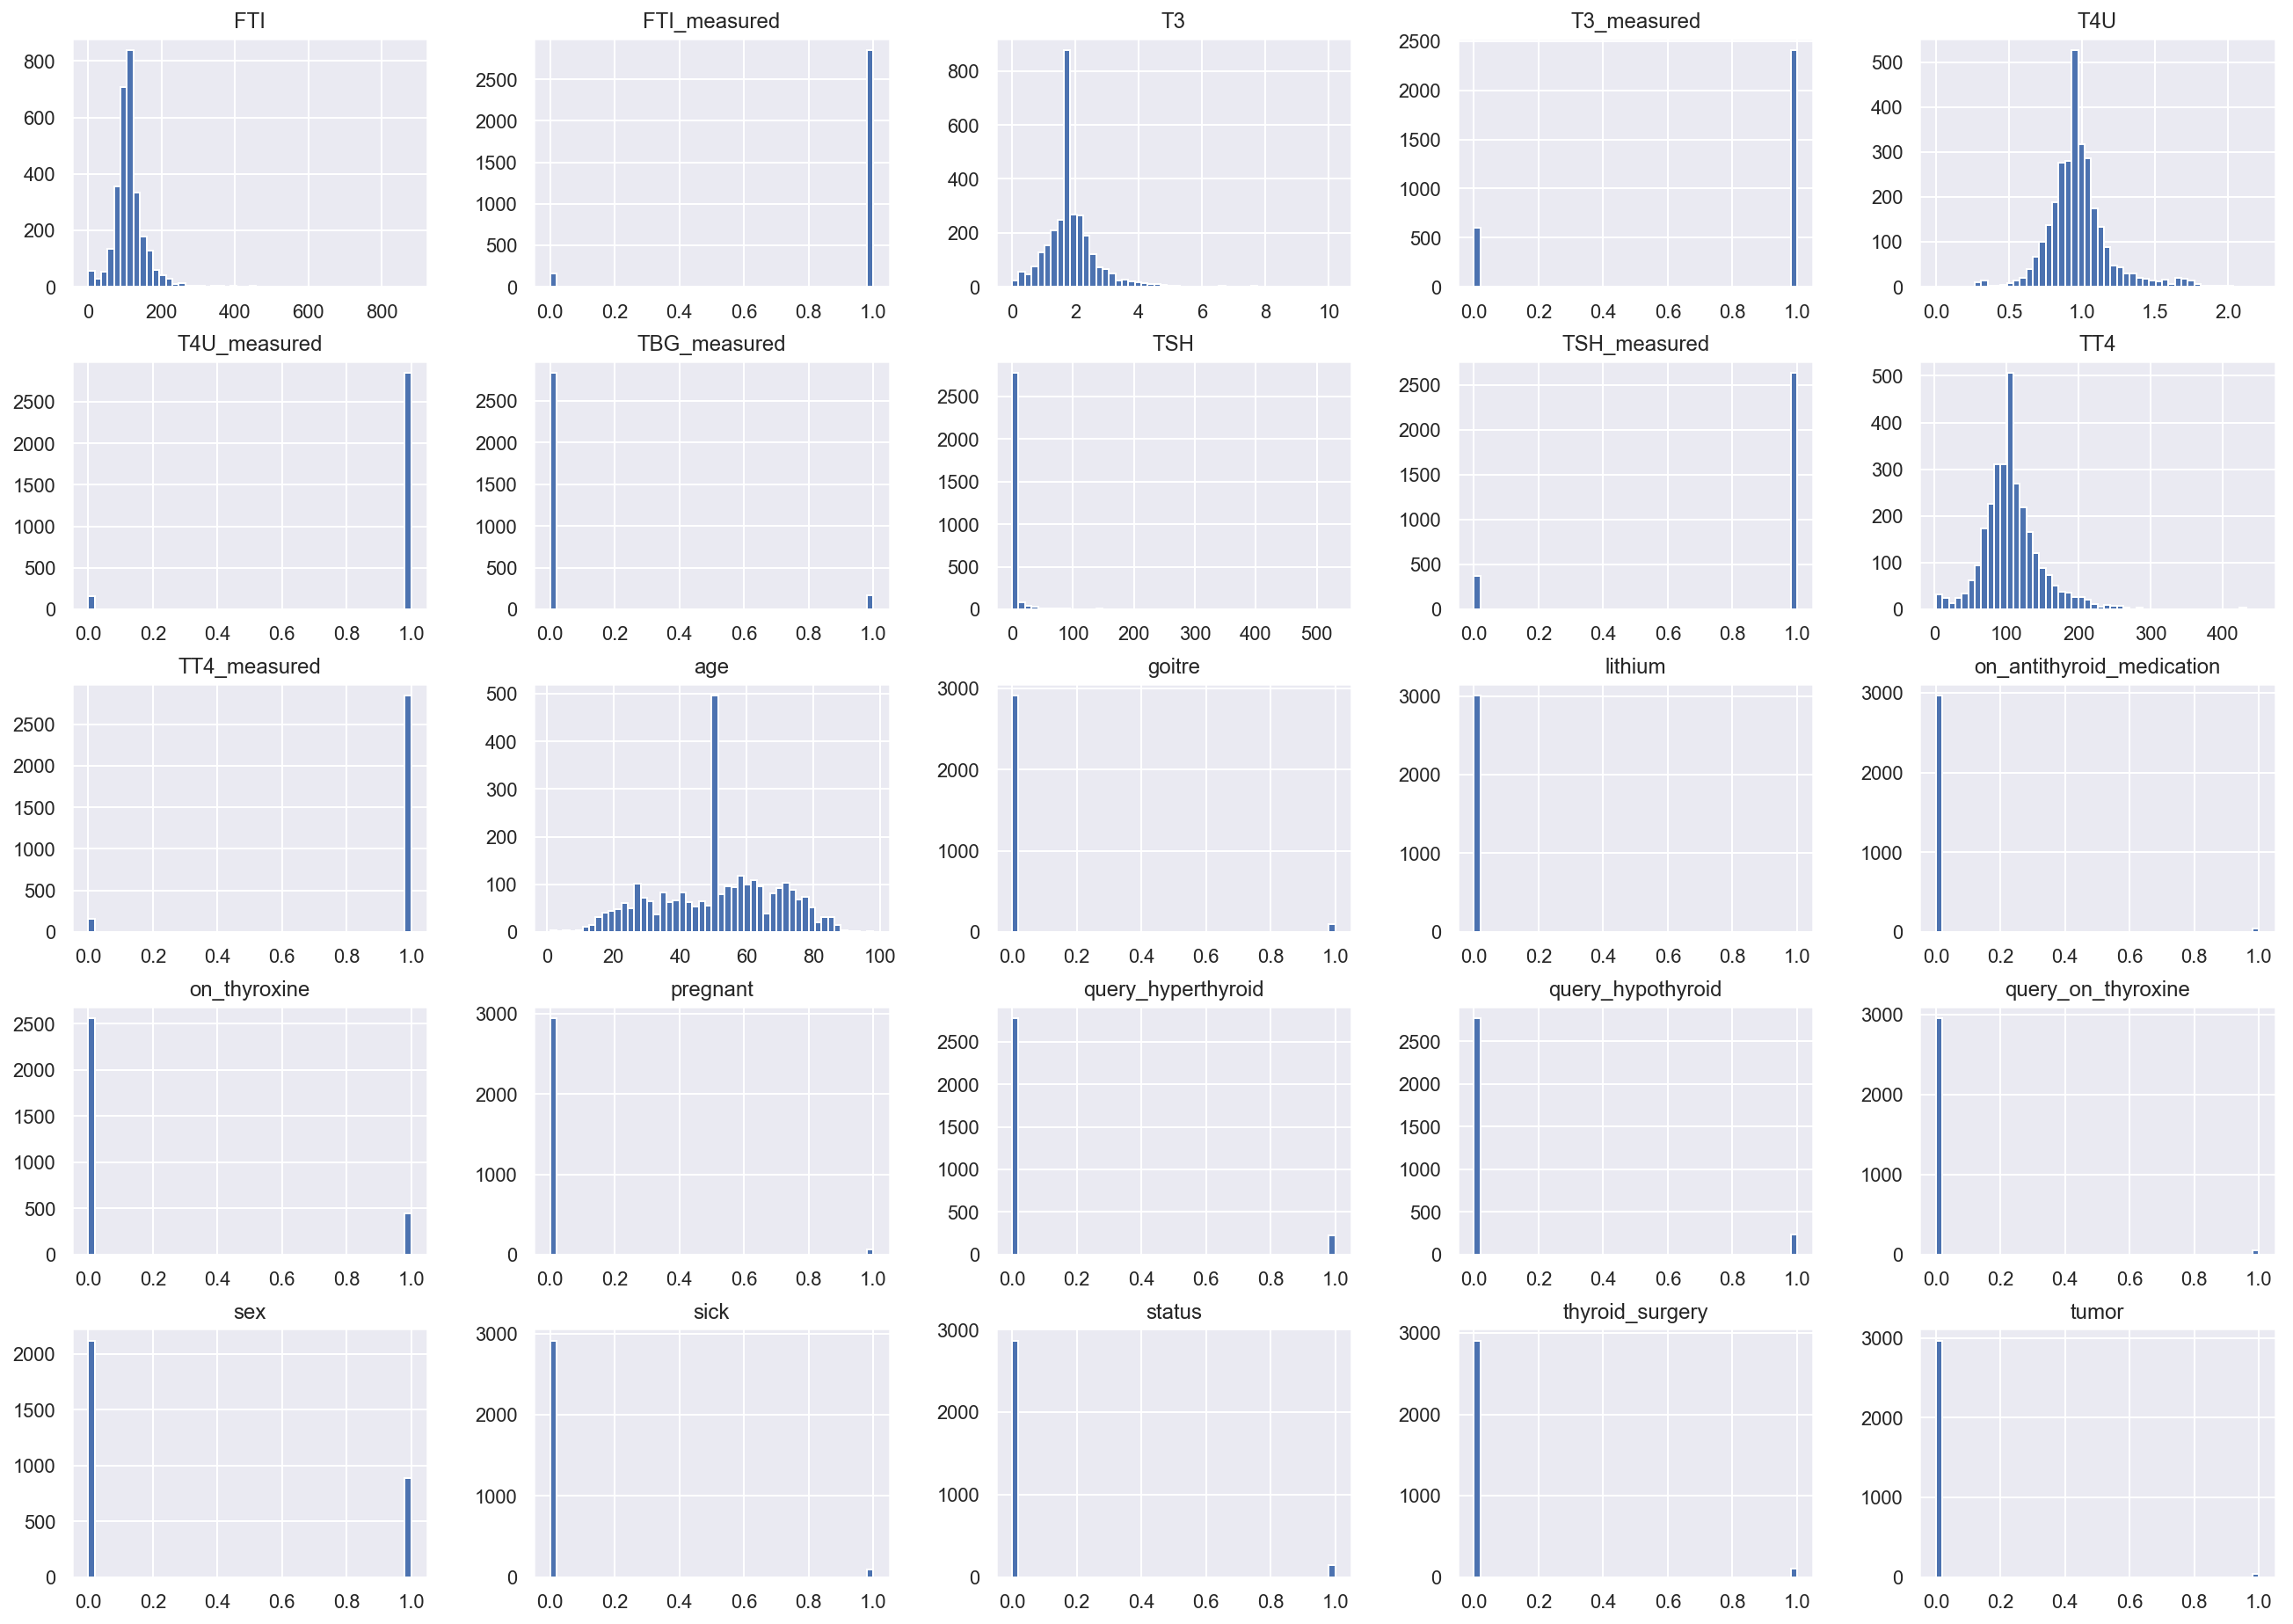

In [25]:
#Distribution plot
df.hist(bins=50,figsize=(20,15))
plt.show()

Observations:
- Sex distribution : Dataset has almost double the female population than males.
- Status - few patients had hypothyroid disease, goitre, tumour, throid surgery, or were sick.
- Age is distributed across all age groups from 0 to 100 with higher density being between 20 and 80 years.



##### Outliers

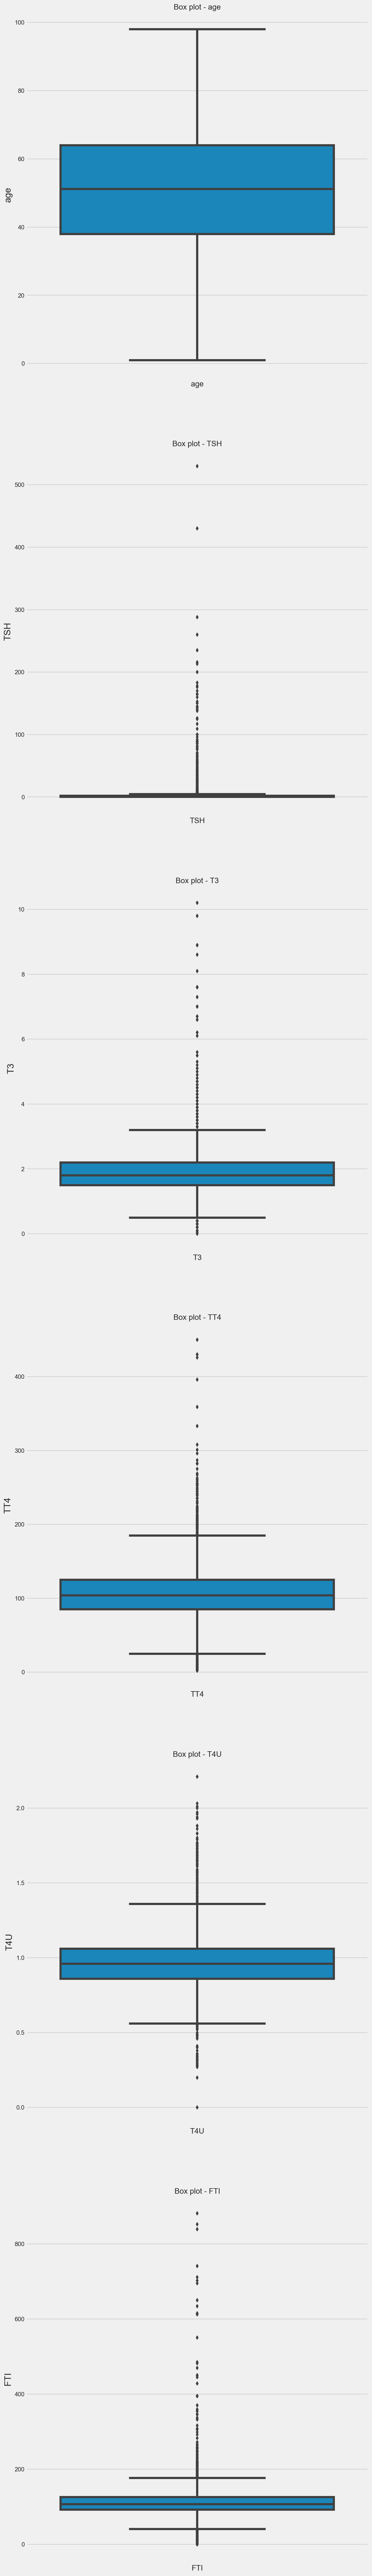

In [26]:
# The plotting is for non binary columns
def plot_boxplots(target_dataframe,col_names):
    
    fig, ax = plt.subplots(len(col_names), figsize=(10,80))
    
    for i, column_name in enumerate(col_names):
        sns.boxplot(y=target_dataframe[column_name], ax=ax[i])
        ax[i].set_title('Box plot - {}'.format(column_name), fontsize=14)
        ax[i].set_xlabel(column_name, fontsize=14)
    
    plt.show()
    
    #Execute the function
outlier_columns =['age','TSH','T3','TT4','T4U','FTI']
plt.style.use('fivethirtyeight')
plot_boxplots(df,outlier_columns)

Outliers noted across all measurements for hormones : TSH, T3, TT4,T4U, FTI

Observations
As recorded above under each of the vizualiation.

Actions:
Hormonal measurements outliers noted require further research or domain analysis to confirm if it is an actual measurement or incorrect entry or calibration error. If so, that would be a justification for dropping the outliers.

For now, the outliers will not be dropped. However, during modelling, a test case for score without outliers in the 5 features above will be done to confirm impact of outliers on success outcome.

### Bi-Variate Analysis

#### Status versus Age

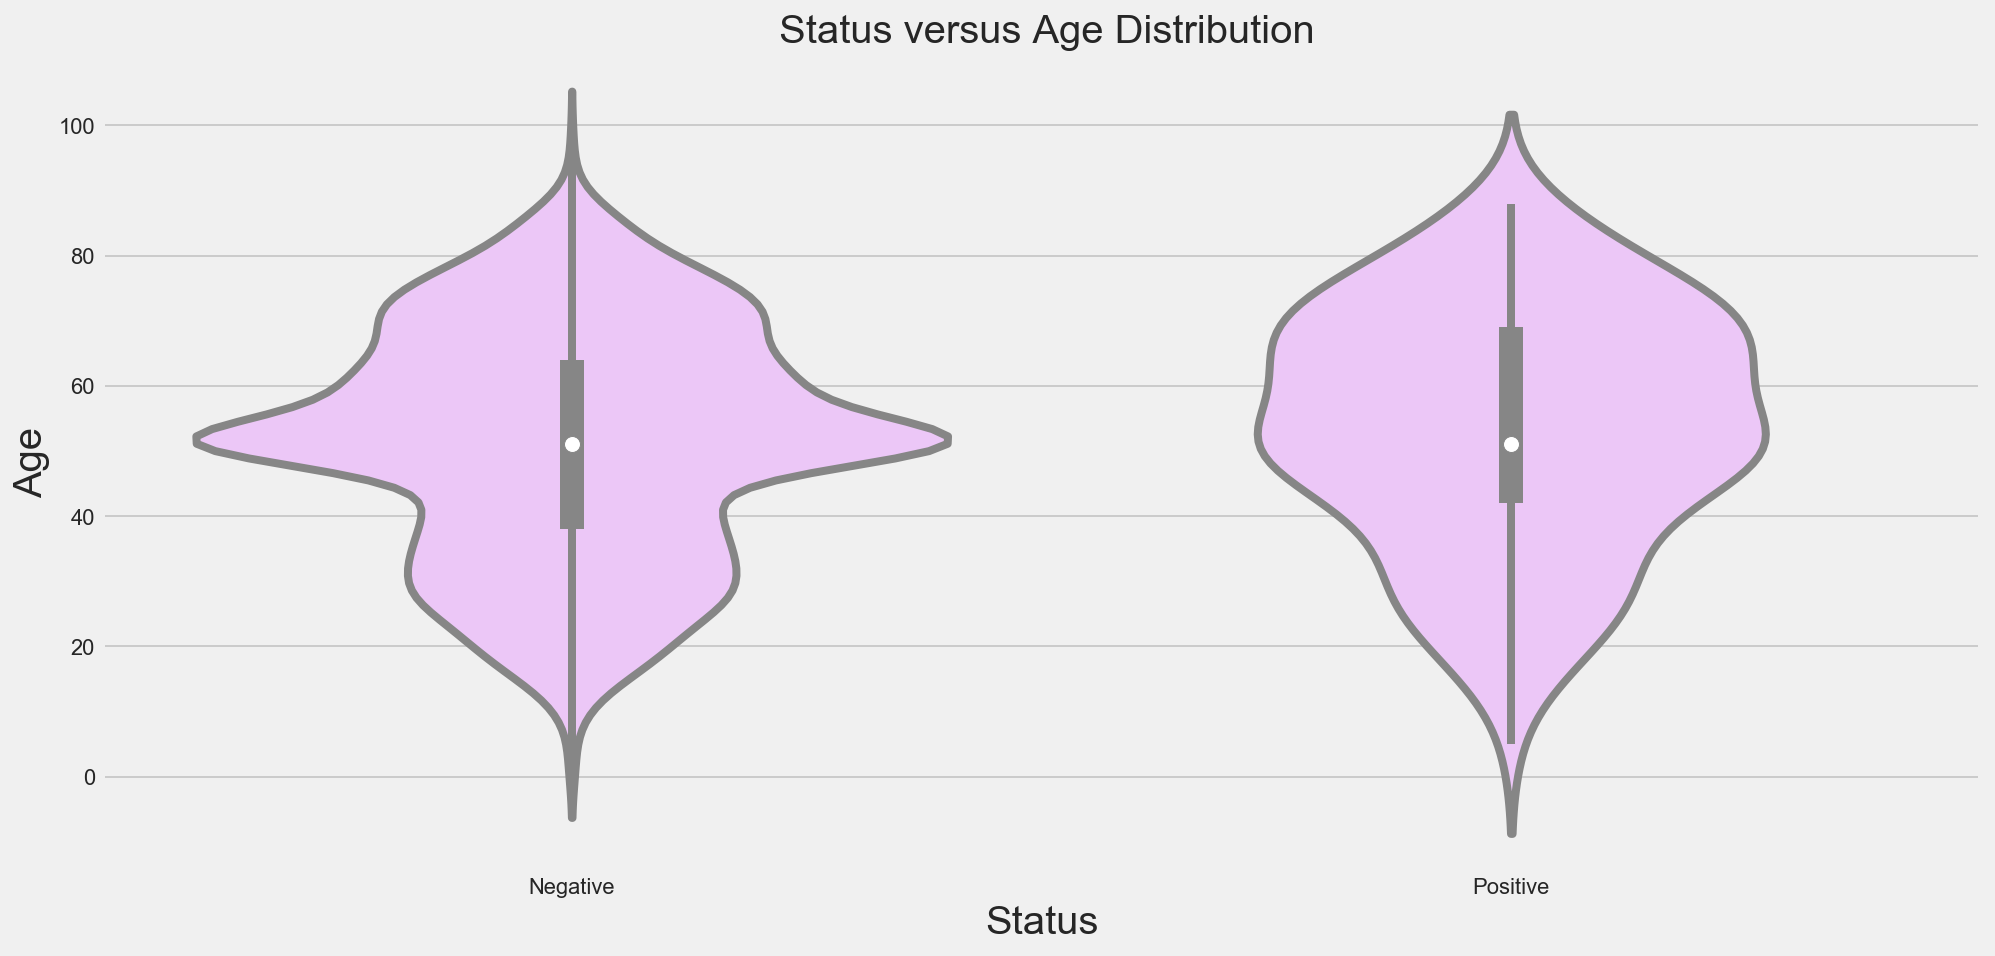

In [27]:
#Violin plot showing distribution of patients with hypothroid versus those without by age
plt.figure(figsize = (15,7))
sns.violinplot(x=df['status'], y=df['age'], color='#F0BFFF')
plt.xticks([0,1], ['Negative',  'Positive'])
plt.ylabel('Age',fontsize = 20)
plt.xlabel('Status',fontsize = 20)
plt.title(' Status versus Age Distribution',fontsize = 20)
plt.show()

As per above, hypothyroid disease affects patients at all ages but is more visible in patients above age 40. Age 70 has highest quantity of affected patients

#### Status versus Age and Gender

<function matplotlib.pyplot.show>

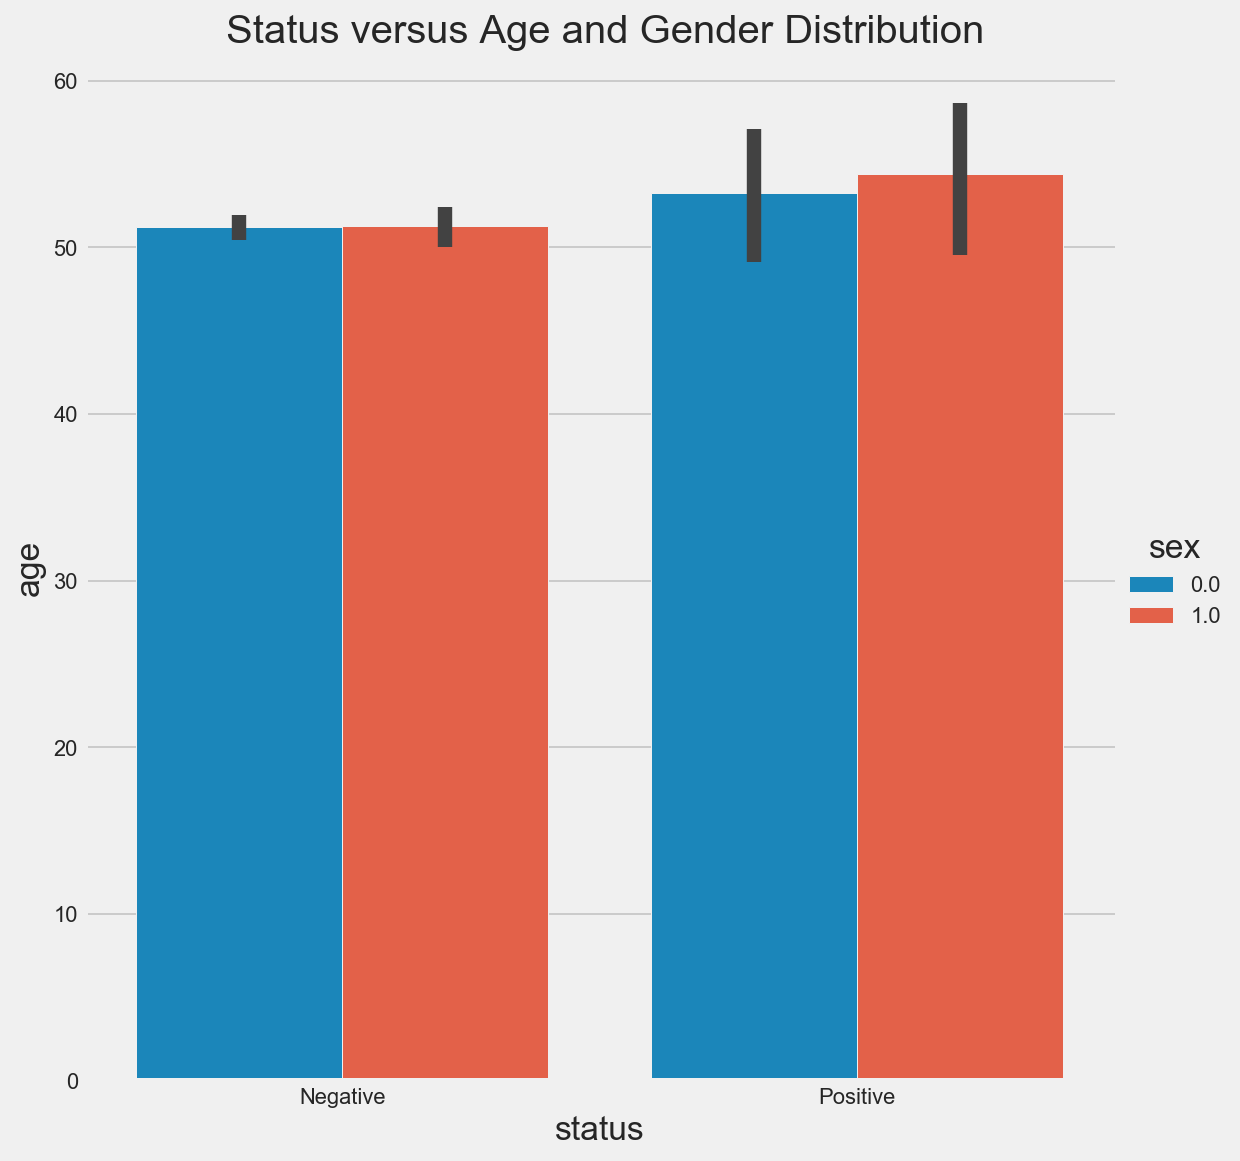

In [28]:
#Plot status by age and gender
sns.factorplot(x='status', y='age', hue="sex" , kind="bar", data=df,size=8,aspect= 1);
plt.xticks([0,1], ['Negative',  'Positive'])
plt.title(' Status versus Age and Gender Distribution',fontsize = 20)
plt.show

1 refers to male and 0 is female.
More males than females tested positive to hypothyroid desease although difference is small.

#### T3 versus TT4 hormones relationship

Text(8.12,0.5,'TT4')

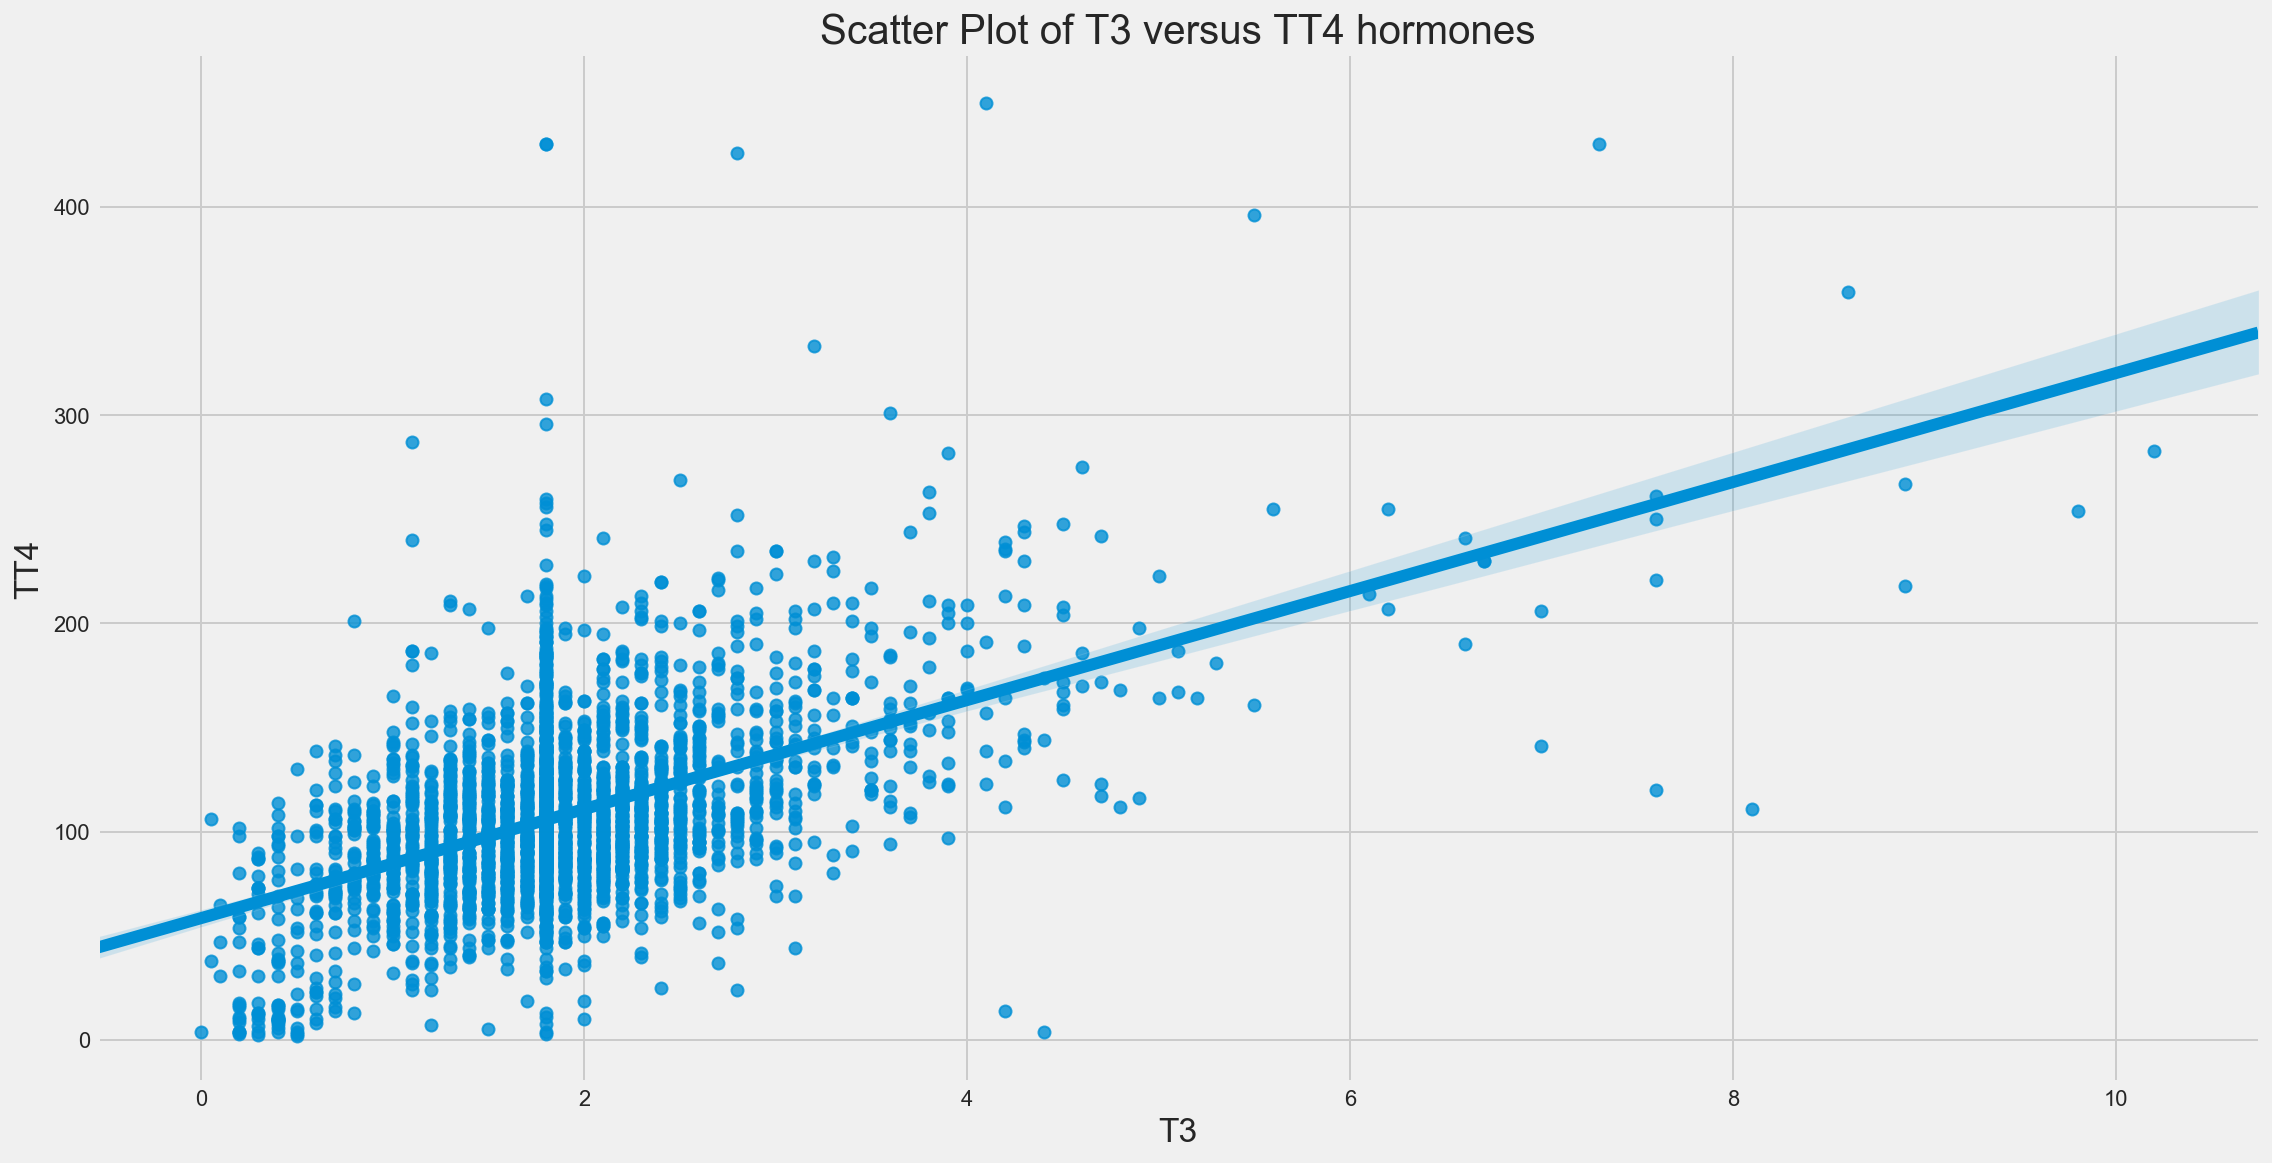

In [29]:
# Scatterplot of T3 versus TT4 hormones
sns.lmplot('T3', 'TT4',data=df,fit_reg=True,size=8,aspect =2)
# Set title
plt.title('Scatter Plot of T3 versus TT4 hormones')
# Set x-axis label
plt.xlabel('T3')
# Set y-axis label
plt.ylabel('TT4')

There is a strong positive linear relationship between T3 and T4 hormones

#### TT4 versus Status

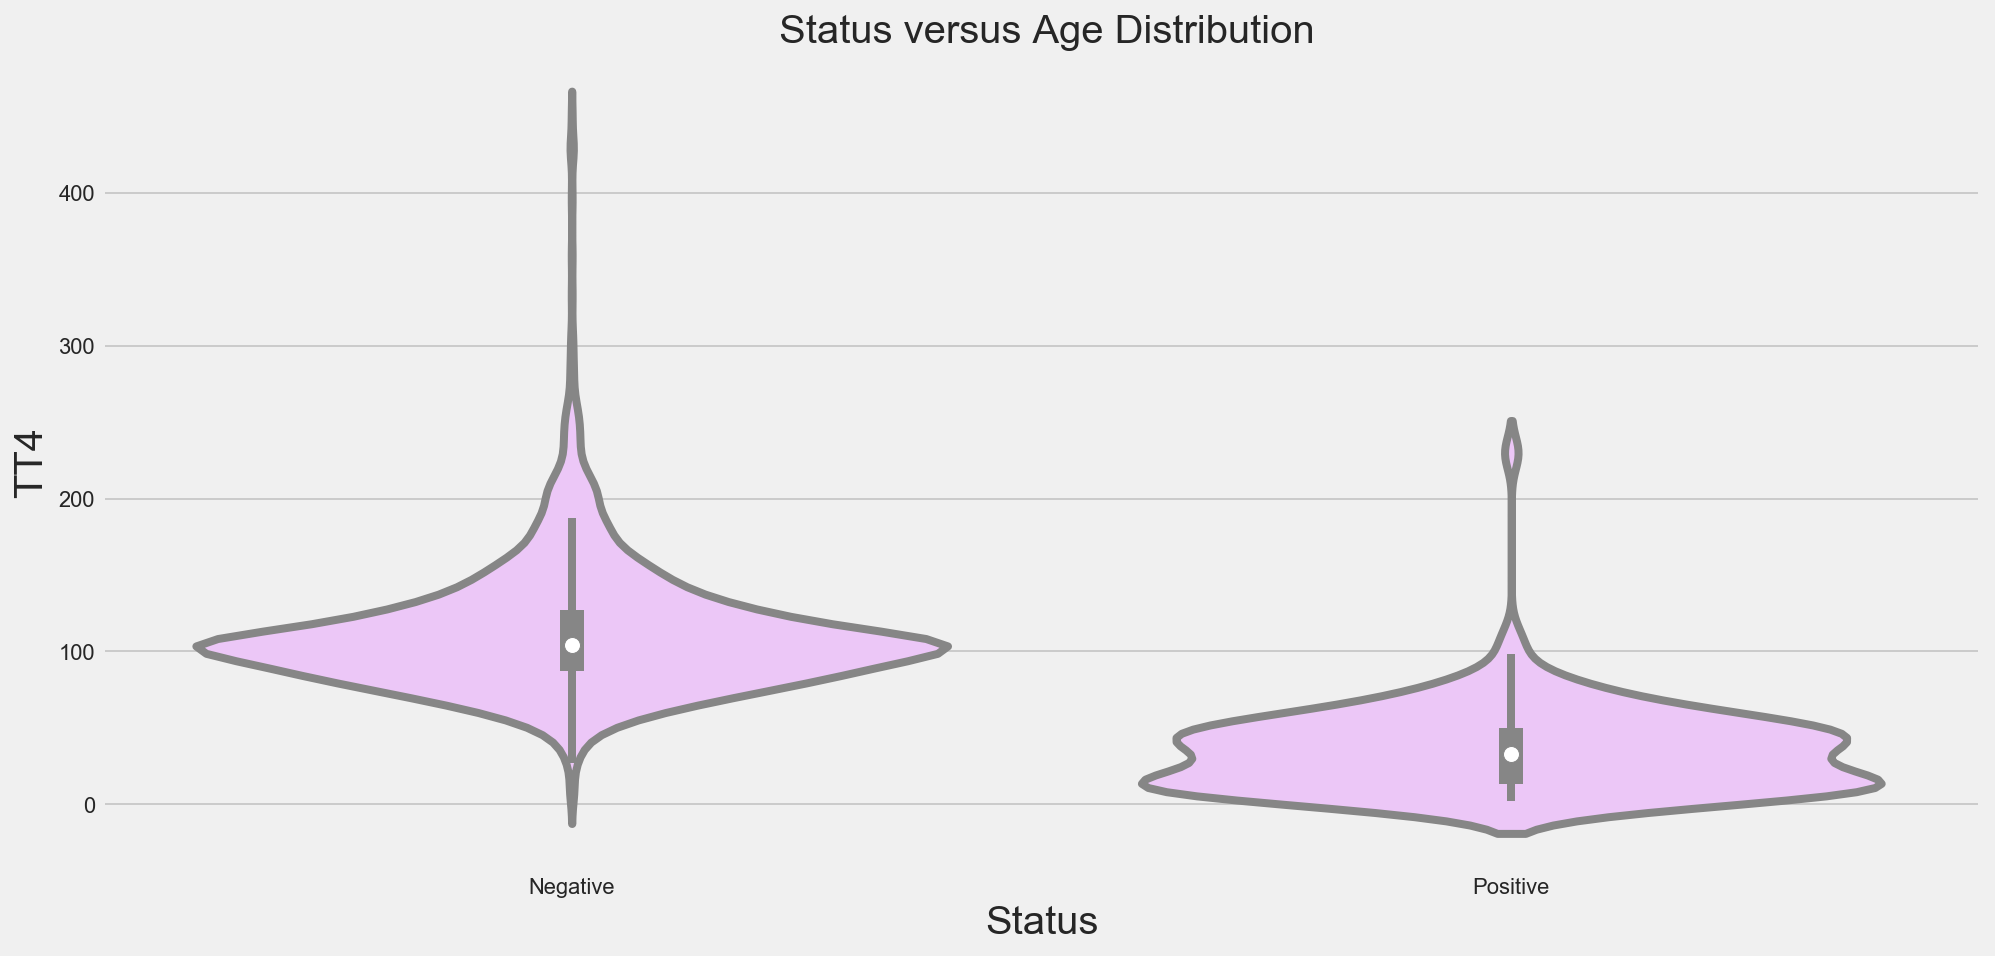

In [30]:
plt.figure(figsize = (15,7))
sns.violinplot(x=df['status'], y=df['TT4'], color='#F0BFFF')
plt.xticks([0,1], ['Negative',  'Positive'])
plt.ylabel('TT4',fontsize = 20)
plt.xlabel('Status',fontsize = 20)
plt.title(' Status versus Age Distribution',fontsize = 20)
plt.show()

Patients with lower status of TT4 hormones have more likelihood of having hypothroid.

#### Goitre versus Status

<function matplotlib.pyplot.show>

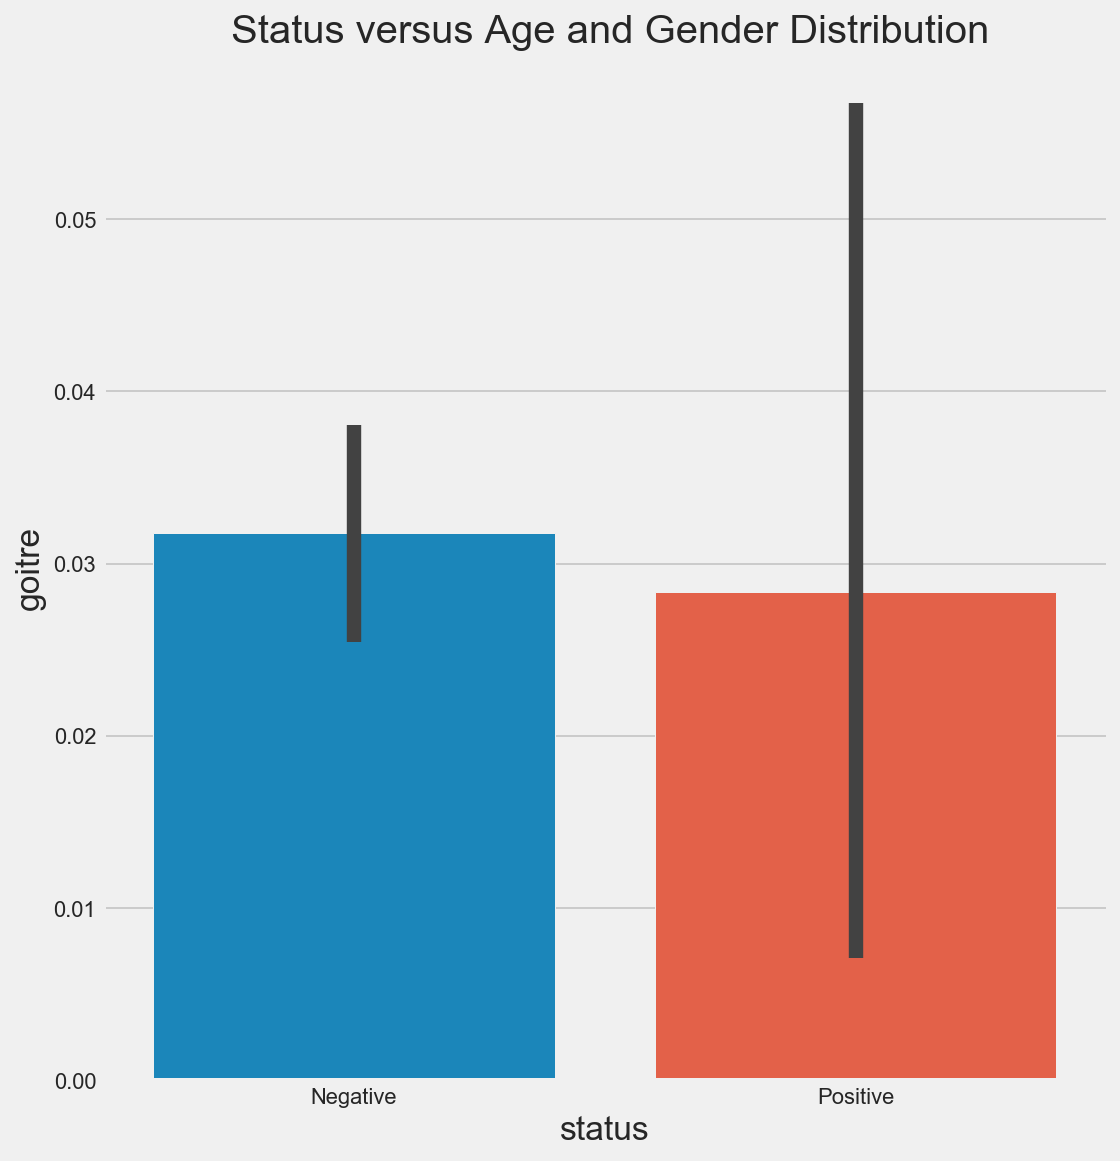

In [31]:
sns.factorplot(x='status', y='goitre',  kind="bar", data=df,size=8,aspect= 1);
plt.xticks([0,1], ['Negative',  'Positive'])
plt.title(' Status versus Age and Gender Distribution',fontsize = 20)
plt.show

There are patients who have goitre and do not have hypothroid disease and vice-versa. Goitre does not have high correlation with hypothyroidism

### 3.4 Correlation

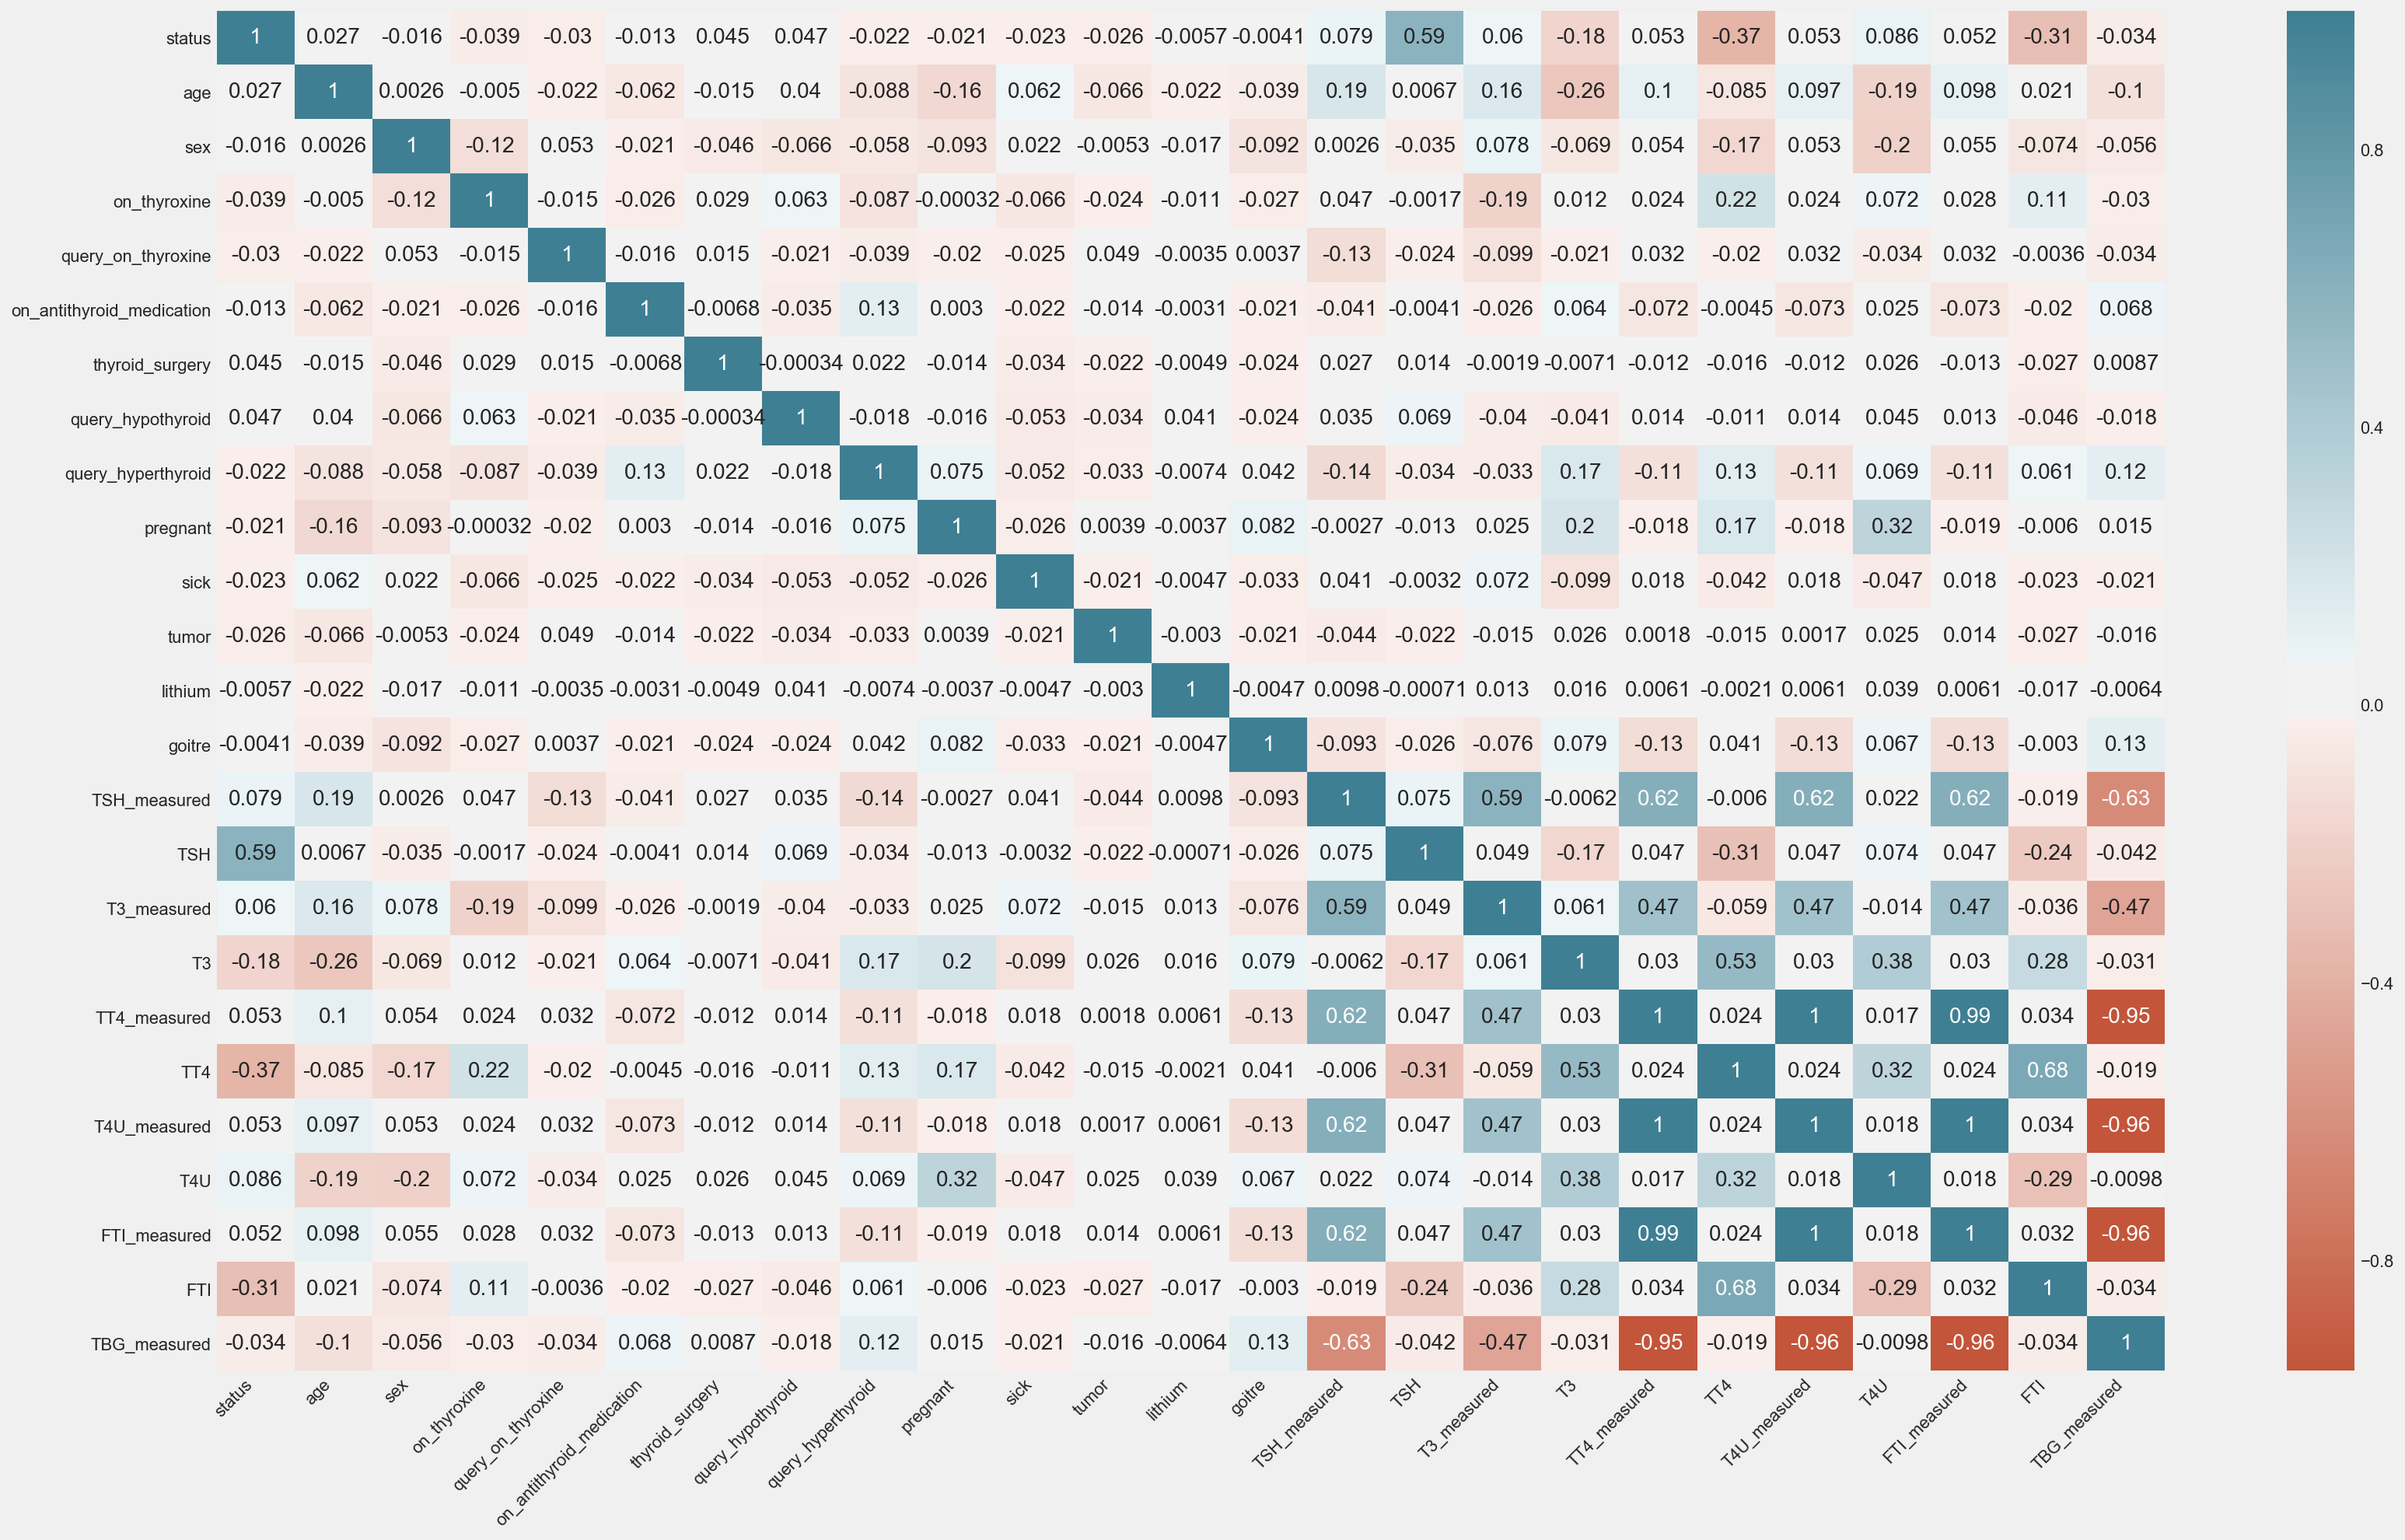

In [32]:
# Correlation 
plt.figure(figsize = (25,15))
ax = sns.heatmap(df.corr(),cmap=sns.diverging_palette(20, 220, n=256), annot = True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right');
plt.show()

Observations.
- White implies low correlation
- Blue is positive correlation. The deeper the shade of blue, the higher the positive correlation.
    TSH has medium positive correlation with status
- Brown is negative correlation. The deeper the shade of brown, the higher the negative correlation.
TT4 and FTI have slightly below average negative correlation with status.

## Modelling

### Split the independent and dependent variables

In [33]:
# We want to predict if one has hypothyroid or not so dependent variable is status. 
# 1 means has disease and 0 has no disease
y = df['status'].values
x_features = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine','on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid','query_hyperthyroid', 'pregnant', 'sick', 
              'tumor', 'lithium', 'goitre','TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4','T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured']
# Updated the features based on importance
x_features = ['TSH', 'FTI', 'T3', 'age', 'T4U', 'T3_measured']

X = df[x_features].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Random Forest Classifier

#### Random Forest Training and Prediction

In [34]:
# Instantiate the model and provide hyperparameters such as min_samples_split or max_depth
forest = RandomForestClassifier(n_estimators = 200, random_state=42, min_samples_split = 20, max_depth=5)
# forest = RandomForestClassifier(n_estimators =200, max_depth =15)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.sample(5)

,Actual,Predicted
509,0,0
335,0,0
250,0,0
67,0,0
456,1,1


####  Model Results

In [35]:
# Create a dataframe to store results
dict = {
        'Model':['Random Forest', 'AdaBoost', 'GBR','GBR Optimized','SVM-RBF','SVM-Linear','SVM-Polynomial'], 
        'R2': [0,0,0,0,0,0,0], 
        'Accuracy Score': [0,0,0,0,0,0,0],
        'F1 score':[0,0,0,0,0,0,0], 
        'Recall':[0,0,0,0,0,0,0], 
        'Precision':[0,0,0,0,0,0,0], 
        'RMSE':[0,0,0,0,0,0,0],
        'TP':[0,0,0,0,0,0,0],
        'TN':[0,0,0,0,0,0,0],
        'FP':[0,0,0,0,0,0,0],
        'FN':[0,0,0,0,0,0,0]} 
df_results = pd.DataFrame(dict,columns = ['Model','R2','Accuracy Score','F1 score','Recall','Precision','RMSE','TP','TN','FP','FN'])

In [36]:
def model_results(model_type,y_test_data, y_prediction_data):
    
    index_val = df_results[df_results['Model']==model_type].index
    
    #Asign scores to dataframe
    df_results.loc[index_val,'F1 score'] = f1_score(y_test_data, y_prediction_data,average='weighted')
    df_results.loc[index_val,'Accuracy Score'] =  accuracy_score(y_test_data, y_prediction_data)
    df_results.loc[index_val,'Recall'] = recall_score(y_test_data, y_prediction_data,average='weighted')
    df_results.loc[index_val,'Precision'] = precision_score(y_test_data, y_prediction_data,average='weighted')
    df_results.loc[index_val,'RMSE']=np.sqrt(mean_squared_error(np.array(y_test_data),y_prediction_data))
    df_results.loc[index_val,'R2'] = r2_score(y_test_data, y_prediction_data)
    
    tn, fp, fn, tp = confusion_matrix(y_test_data, y_prediction_data).ravel()
    df_results.loc[index_val,'TP'] =tp
    df_results.loc[index_val,'TN'] =tn
    df_results.loc[index_val,'FP'] =fp
    df_results.loc[index_val,'FN'] =fn

    return(df_results)

In [37]:
model_results('Random Forest',y_test, y_pred)

,Model,R2,Accuracy Score,F1 score,Recall,Precision,RMSE,TP,TN,FP,FN
0,Random Forest,0.790,0.990,0.990,0.990,0.990,0.100,25,571,1,5
1,AdaBoost,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0
2,GBR,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0
3,GBR Optimized,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0
4,SVM-RBF,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0
5,SVM-Linear,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0
6,SVM-Polynomial,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0


Since the data is imbalanced as we have more positives than negatives,  F1 score is the best measure. The F1 score is at 99%. This is worrying as could imply overfitting. This requires checking the outcome of confusion matrix.

From confusion matrix, True positives are 571. True Negatives are 25. False positives are 5. False negatives is only 1. Hence only 6 test records were misclassified. 

 False positives in medical scenario are better than false negatives since a health proffessional can validate the false positive ones. The model is not sending away many patients who are sick. Only one was false negative.

This implies the model is of good fit.


#### Tree output

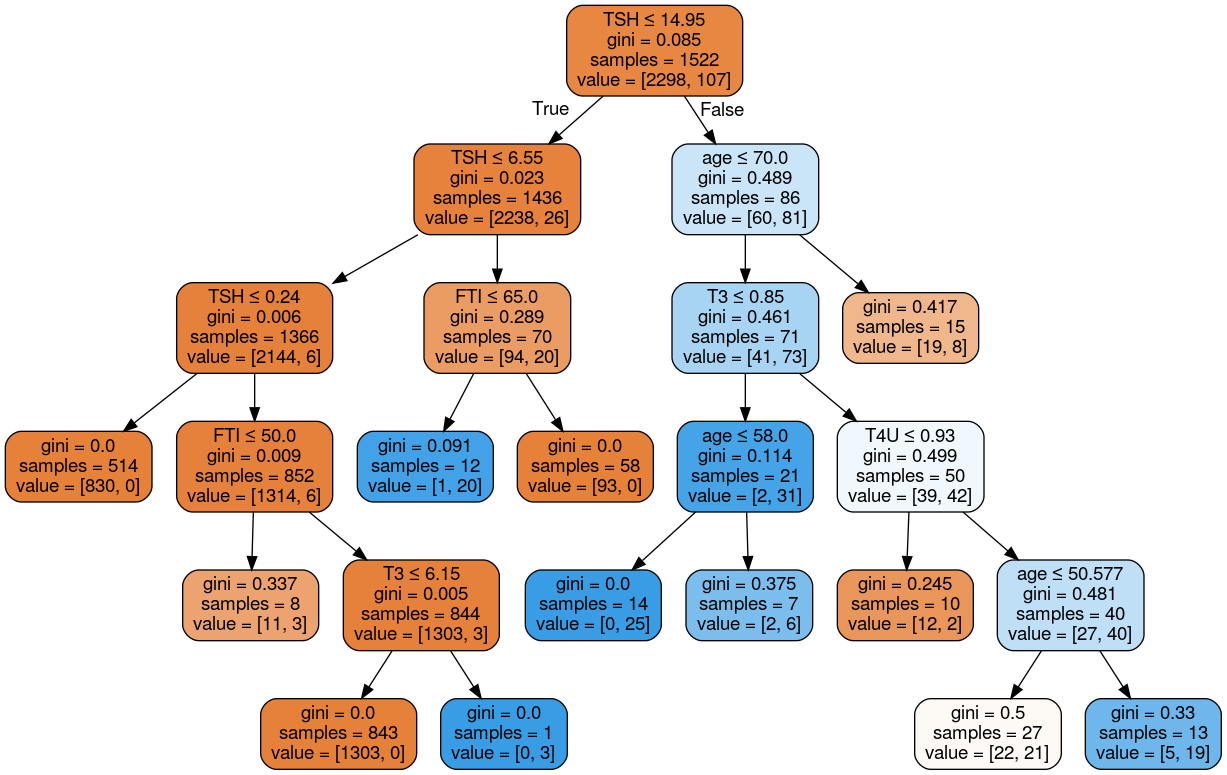

In [38]:
## Check the performance of sample tree output
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = x_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())


#### Feature Importance

In [39]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(x_features, importances)]

# Sort the values in descending order, to observe most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: TSH                  Importance: 0.6
Variable: FTI                  Importance: 0.21
Variable: T3                   Importance: 0.09
Variable: age                  Importance: 0.06
Variable: T4U                  Importance: 0.03
Variable: T3_measured          Importance: 0.0


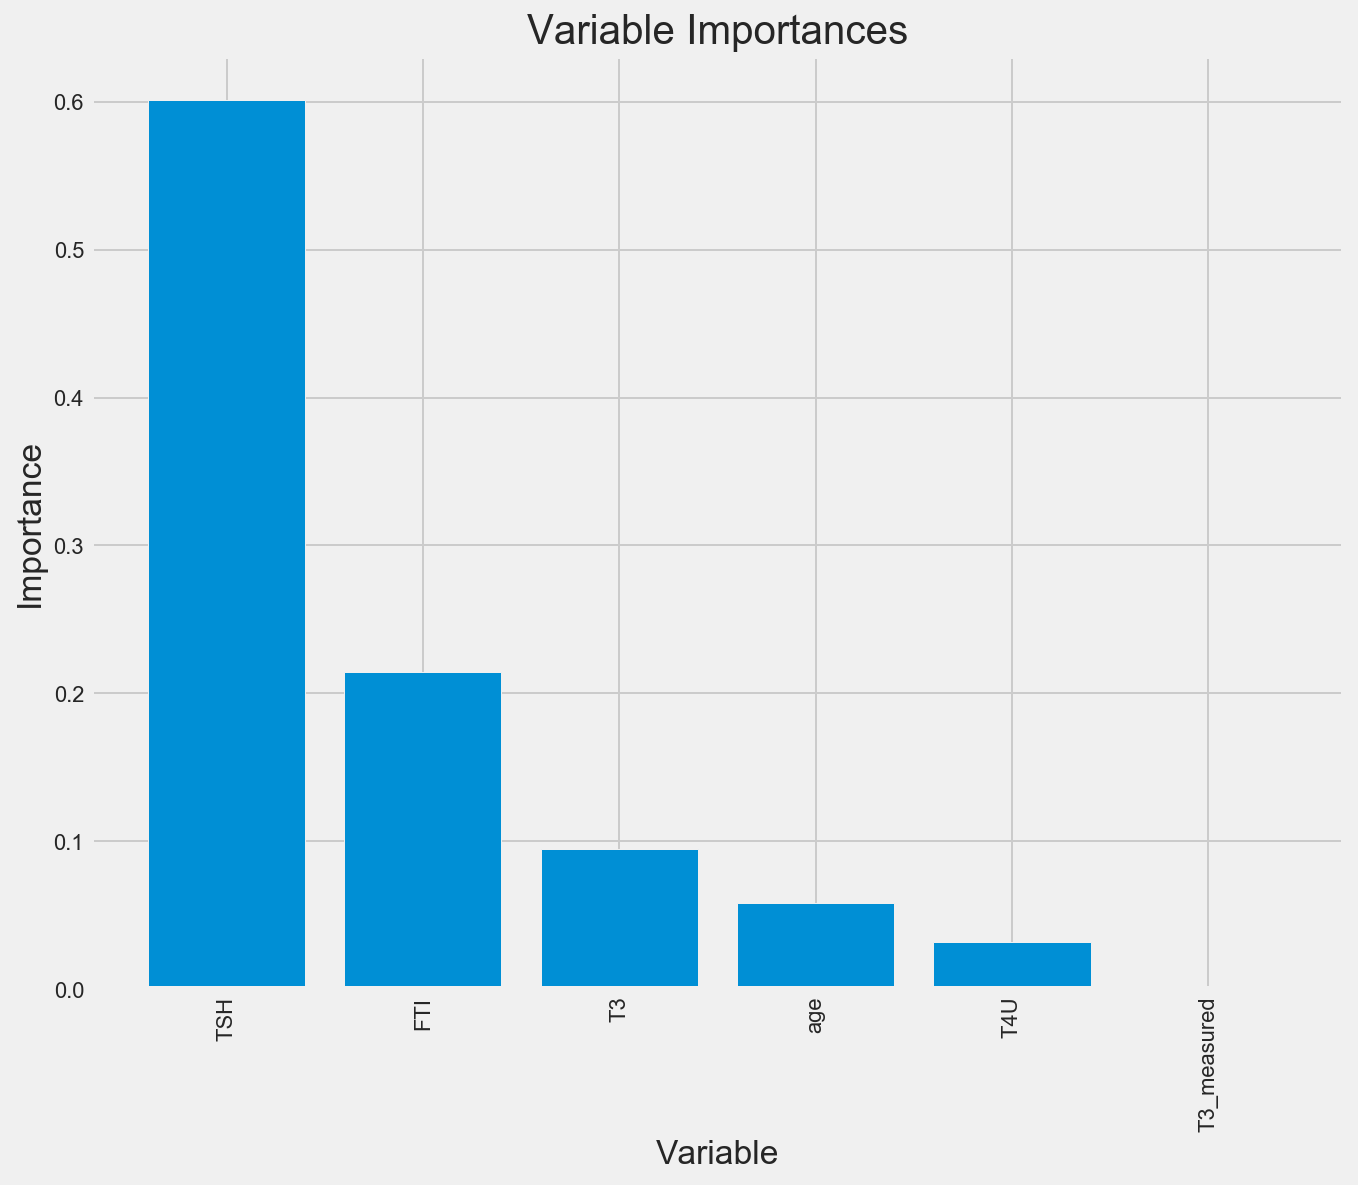

In [40]:
#Visual representation of importance
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, x_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

### AdaBoost Classifier



#### AdaBoost training and prediction

In [41]:
# Max depth is 1.
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)

ada_boost = ada_boost.fit(X_train, y_train)
y_pred_ada = ada_boost.predict(X_test)

#Get the scores
model_results('AdaBoost',y_test, y_pred_ada)


,Model,R2,Accuracy Score,F1 score,Recall,Precision,RMSE,TP,TN,FP,FN
0,Random Forest,0.790,0.990,0.990,0.990,0.990,0.100,25,571,1,5
1,AdaBoost,0.930,0.997,0.997,0.997,0.997,0.058,29,571,1,1
2,GBR,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0
3,GBR Optimized,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0
4,SVM-RBF,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0
5,SVM-Linear,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0
6,SVM-Polynomial,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0


#### Adaboost Observations

### Gradient Boosting Classifier

#### Baseline GBR

In [42]:
# Perform gradient boosting using intuitive hyperparameters
gbr = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, max_depth=5)

gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

#Get the scores
model_results('GBR',y_test, y_pred_gbr)

,Model,R2,Accuracy Score,F1 score,Recall,Precision,RMSE,TP,TN,FP,FN
0,Random Forest,0.790,0.990,0.990,0.990,0.990,0.100,25,571,1,5
1,AdaBoost,0.930,0.997,0.997,0.997,0.997,0.058,29,571,1,1
2,GBR,0.790,0.990,0.990,0.990,0.990,0.100,26,570,2,4
3,GBR Optimized,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0
4,SVM-RBF,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0
5,SVM-Linear,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0
6,SVM-Polynomial,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0


#### Optimized GBR using Hyperparameters

Steps:

1. Identify optimal hyperparameters. To identify hyperparameters, used steps implemented in this article. https://medium.com/all-things-ai/in-depth-parameter-tuning-for-gradient-boosting-3363992e9bae

2. Apply the hyperparameters to the model

**Optimal Parameters**

**a) Learning rate**

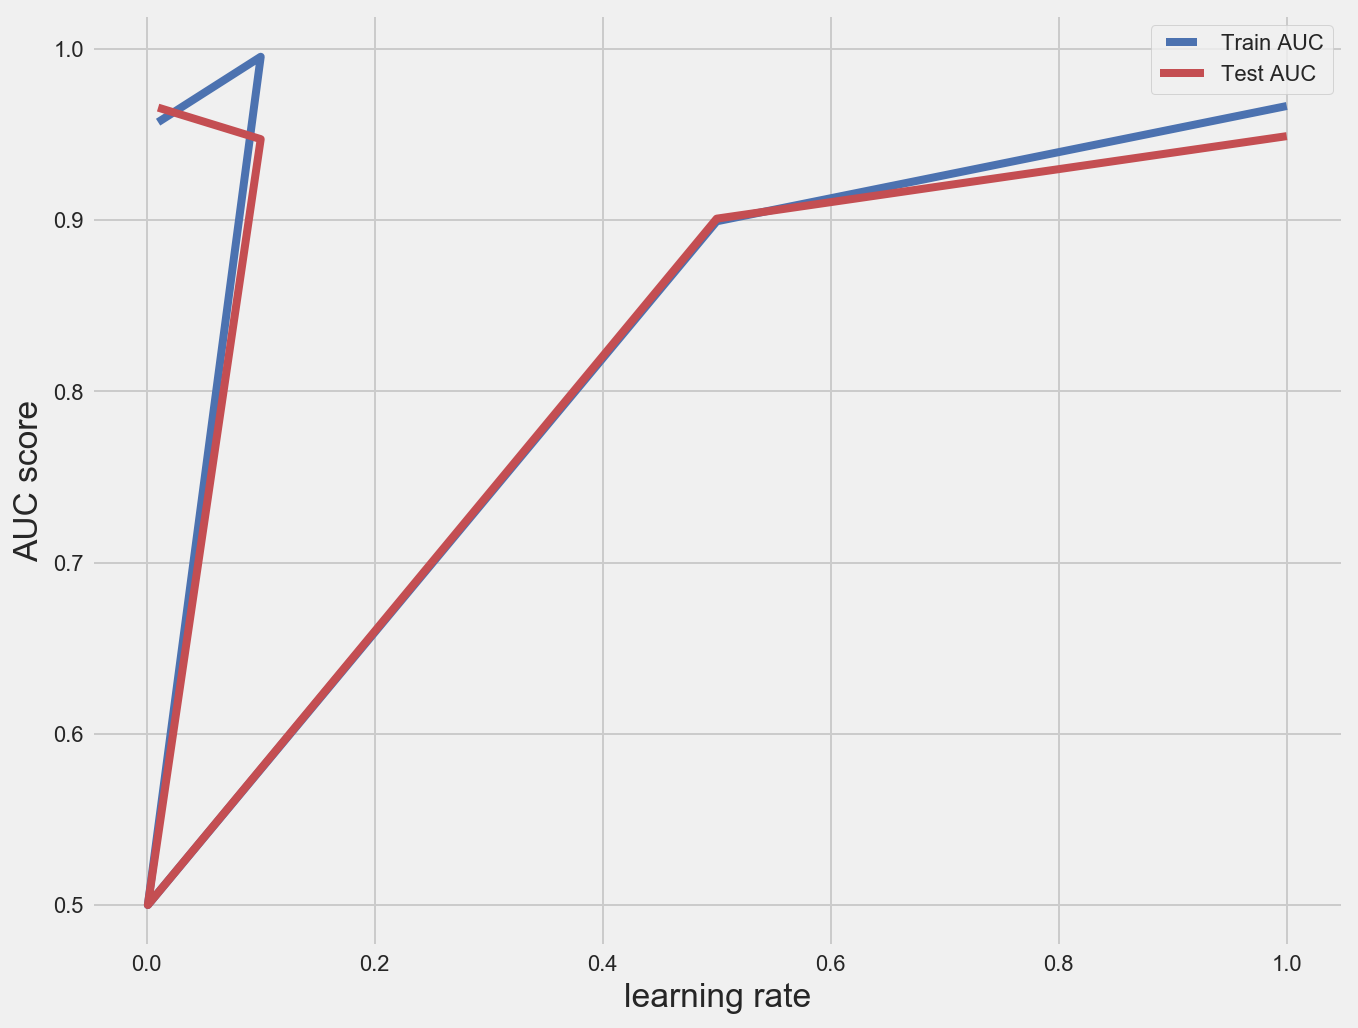

In [43]:
#Identify the optimal learning rate hyperparameter based on list below. 
learning_rates = [ 0.01,0.1,0.001,0.5,1]
train_results = []
test_results = []

for eta in learning_rates:
   model = GradientBoostingClassifier(learning_rate=eta)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label='Train AUC')
line2, = plt.plot(learning_rates, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('learning rate')
plt.show()

0.09 is the optimal learning rate parameter to apply.

High learning rate results to overfitting i.e variance between test and train based on are and the curve graph above

**b) Learning Trees**

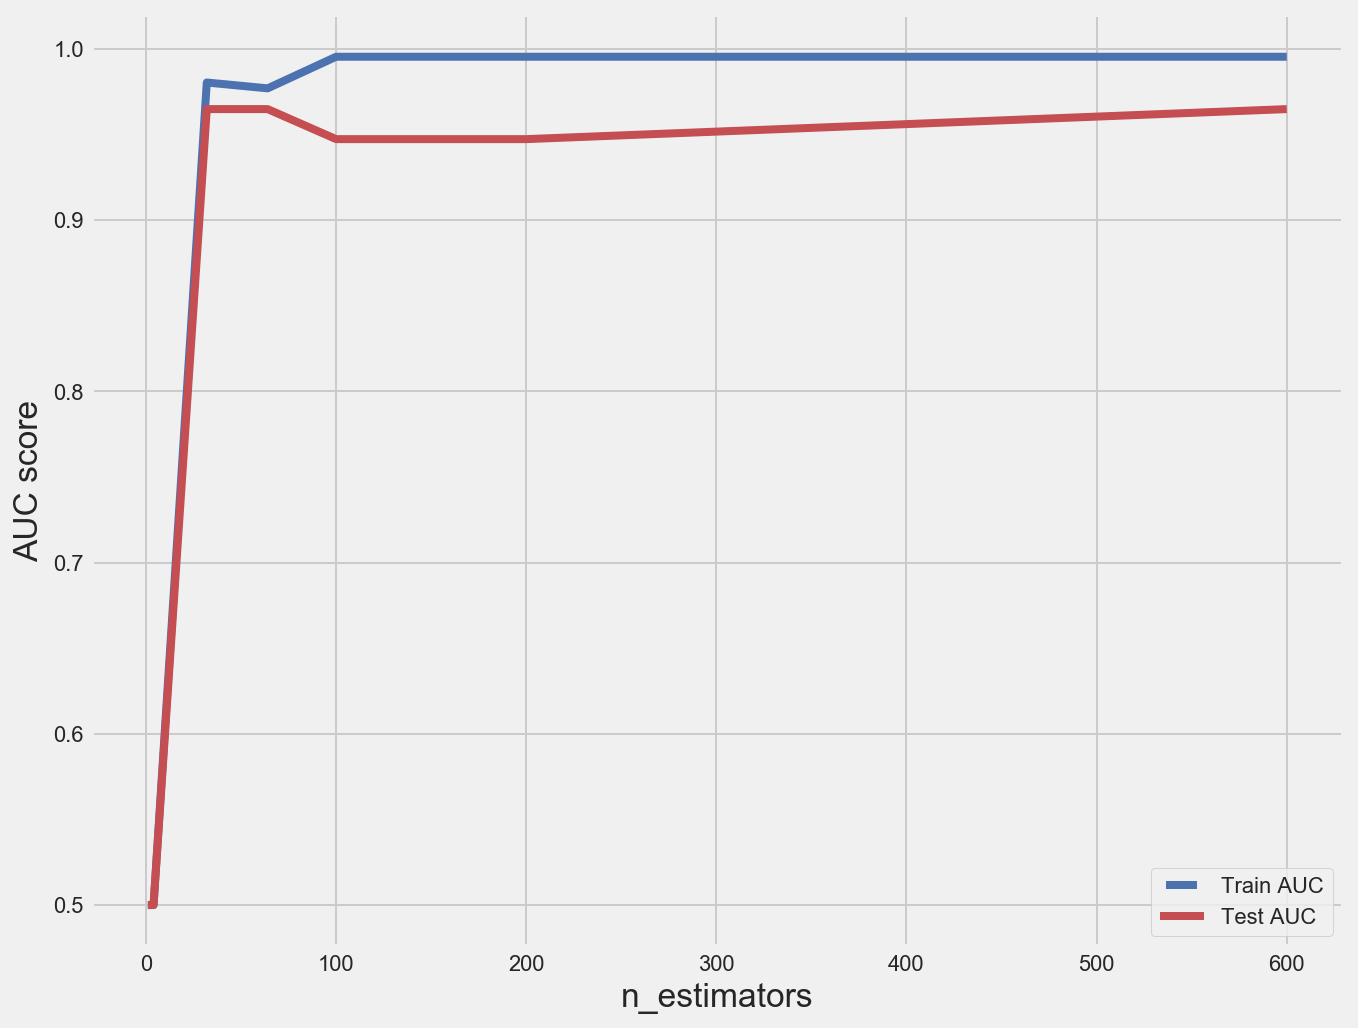

In [44]:
n_estimators = [1, 2, 4,32,64,100,200,600]
train_results = []
test_results = []
for estimator in n_estimators:
   model = GradientBoostingClassifier(n_estimators=estimator)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

50 trees are optimal. Higher than that there is overfitting.

**Maximum Depth**

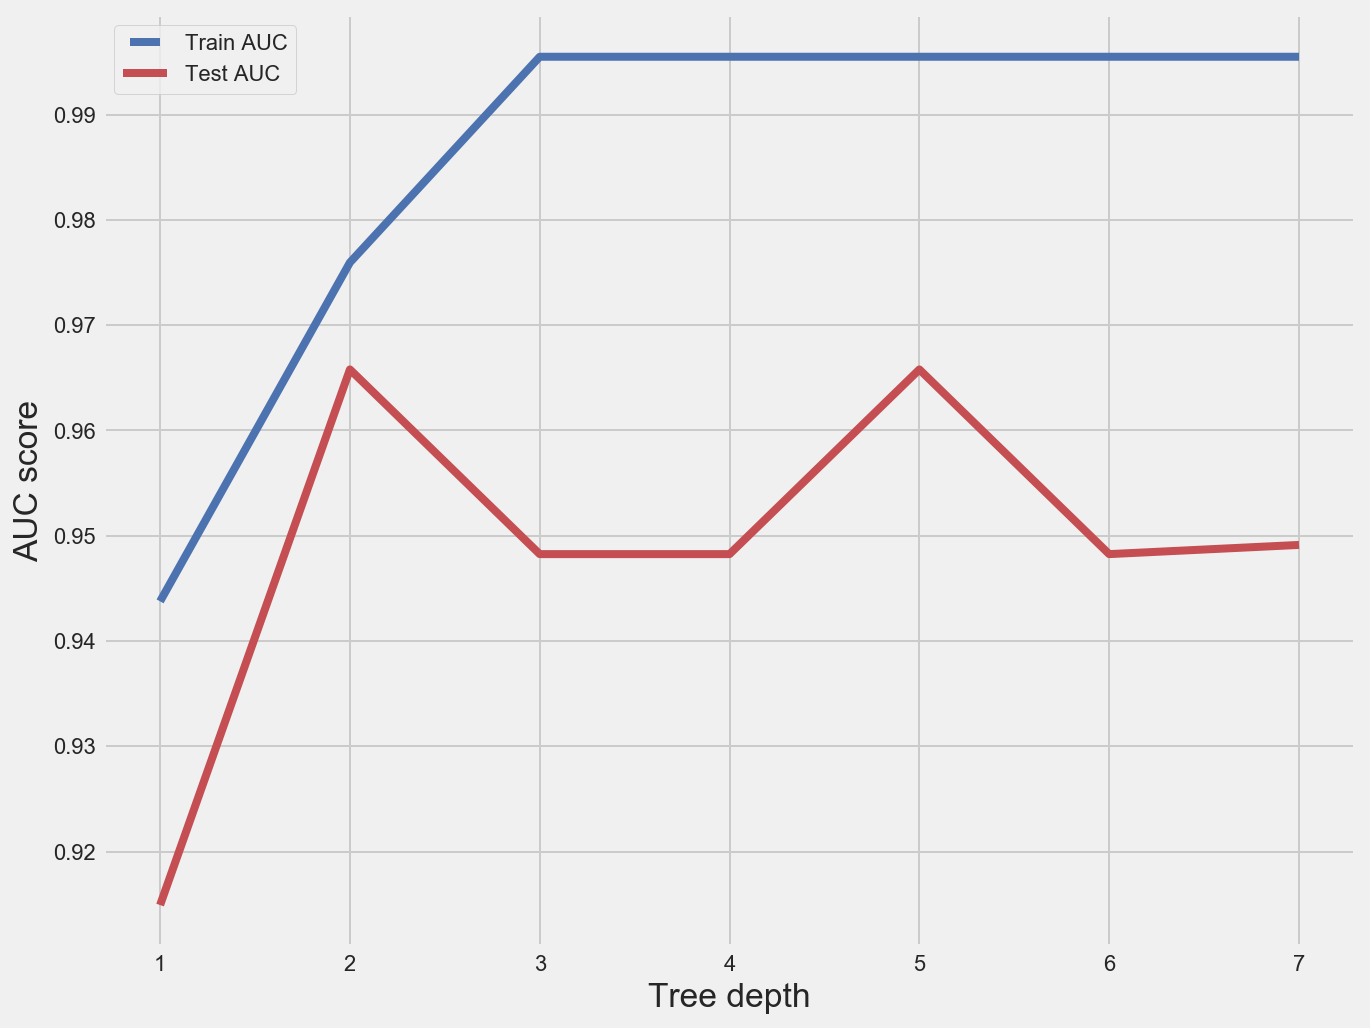

In [45]:
# max_depths = np.linspace(1, 32, 32, endpoint=True)
max_depths = [1, 2, 3,4,5,6,7]
train_results = []
test_results = []
for max_depth in max_depths:
   model = GradientBoostingClassifier(max_depth=max_depth)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

Depth of 2 is optimal

#### Apply Optimized Hyperparameters  to Gradient boosting classifier

In [46]:
gbr = GradientBoostingClassifier(n_estimators=50, learning_rate=0.09, max_depth=2,)

gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)


#Get the scores
model_results('GBR Optimized',y_test, y_pred_gbr)

,Model,R2,Accuracy Score,F1 score,Recall,Precision,RMSE,TP,TN,FP,FN
0,Random Forest,0.790,0.990,0.990,0.990,0.990,0.100,25,571,1,5
1,AdaBoost,0.930,0.997,0.997,0.997,0.997,0.058,29,571,1,1
2,GBR,0.790,0.990,0.990,0.990,0.990,0.100,26,570,2,4
3,GBR Optimized,0.860,0.993,0.993,0.993,0.993,0.082,27,571,1,3
4,SVM-RBF,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0
5,SVM-Linear,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0
6,SVM-Polynomial,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0


Optimization increases r2 score from 79% to 86%. F1 score is almose same as other models at 99.3%

The False negatives 3 are higher than false positives 1.

### Support Vector Machine Classifier

#### Pre-Processing

Since SVM is a distance based classifier, the features will be scaled to remove 

In [47]:
y_svm = df['status'].values
x_svm_features = ['FTI','TSH','age','T3','on_antithyroid_medication','thyroid_surgery','query_hypothyroid']
X_svm = df[x_svm_features].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X_svm, y_svm, test_size=0.2, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### SVM  with RBF kernel Classifier

#### Default RBF hyperparameters

In [48]:
# Training and Prediction
throid_svc_model = SVC(kernel ='rbf')

# Train the model using the training set
throid_svc_model.fit(X_train,y_train)

# Predict the response for the test set
y_pred_svm = throid_svc_model.predict(X_test)

##Results
#Get the scores
model_results('SVM-RBF',y_test, y_pred_svm)

,Model,R2,Accuracy Score,F1 score,Recall,Precision,RMSE,TP,TN,FP,FN
0,Random Forest,0.790,0.990,0.990,0.990,0.990,0.100,25,571,1,5
1,AdaBoost,0.930,0.997,0.997,0.997,0.997,0.058,29,571,1,1
2,GBR,0.790,0.990,0.990,0.990,0.990,0.100,26,570,2,4
3,GBR Optimized,0.860,0.993,0.993,0.993,0.993,0.082,27,571,1,3
4,SVM-RBF,0.544,0.978,0.976,0.978,0.978,0.147,18,571,1,12
5,SVM-Linear,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0
6,SVM-Polynomial,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0


Despite the high F1 score,High levels of false negatives noted. This means model will send away 29 patients as negative whereas they are positive.
Optimization of the model is required to fix this.

#### SVM - RBF hyperparameters optimization

Parameters Optimization

**a) Gamma**

Gamma parameter defines how far the influence of a single training example reaches, with low values meaning 'far' and high values meaning 'close'.

In [49]:
#Parameter List for Gamma
gamma_range=[0.0001,0.001,0.01,0.1,1]

acc_score=[]

#Loop through the Gamma range above
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X_train, y_train, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.9538483762559584, 0.9625759576146224, 0.9754719059703028, 0.978383400203468, 0.9763000525816444]


Best accuracy is at gamma parameter of 0.001

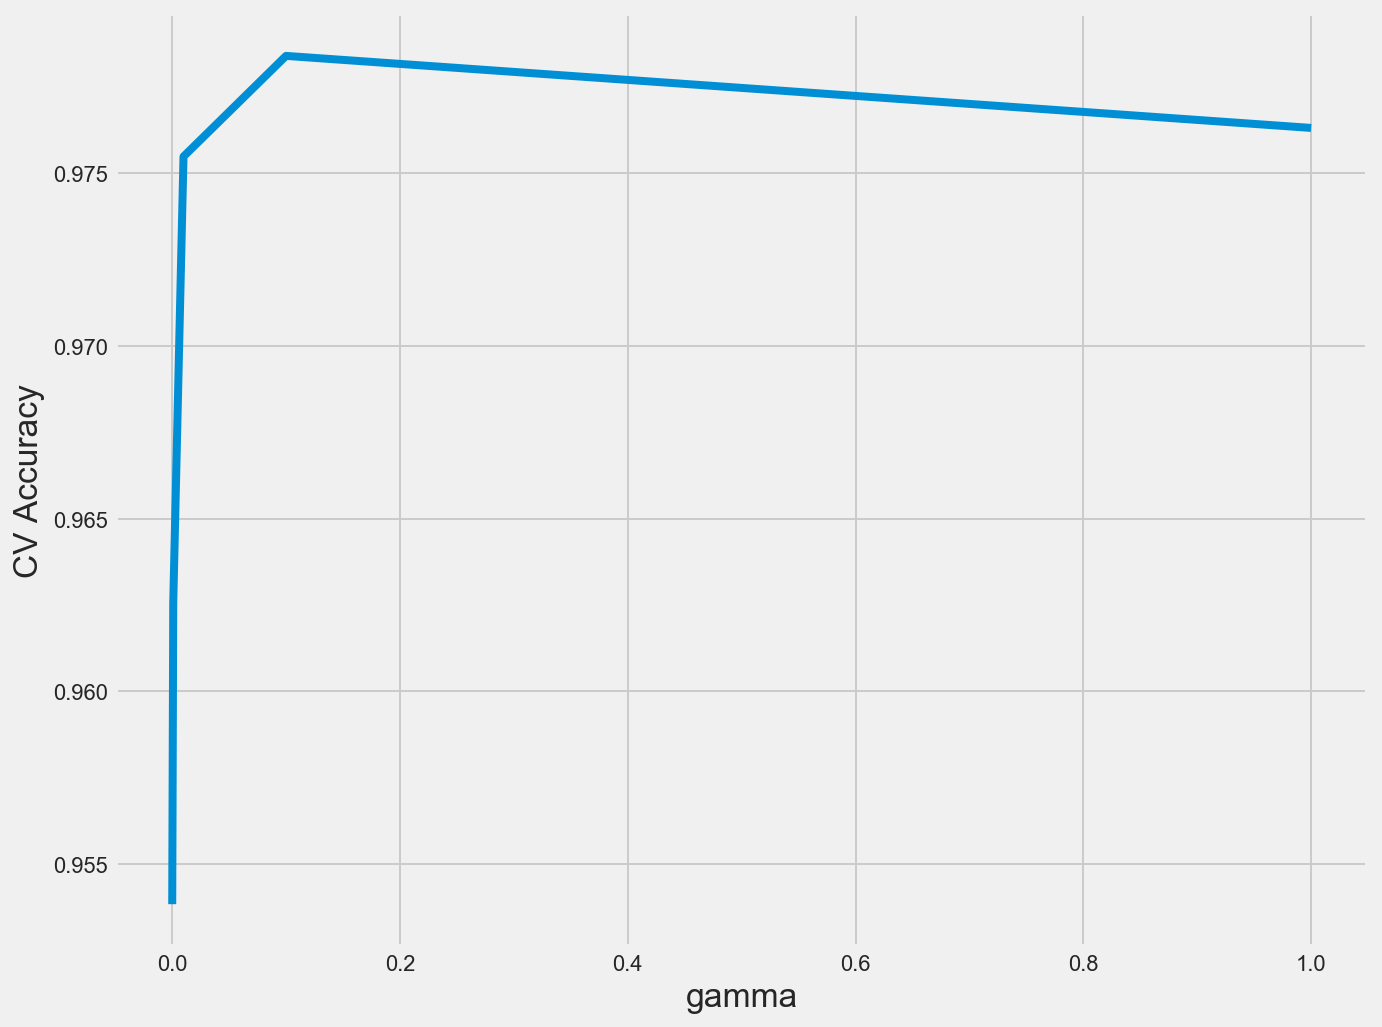

In [50]:
# Plot the value of gamma (x-axis) versus the cross-validated accuracy (y-axis)
ax = sns.lineplot(x=gamma_range, y=acc_score)
plt.xlabel('gamma')
plt.ylabel('CV Accuracy')
plt.show()

**C parameter**

In [51]:
#Parameter List for C
C_range=list(range(1,10))
acc_score=[]

#Loop through the C range above
for c in C_range:
    svc = SVC(kernel='rbf', C=c)
    scores = cross_val_score(svc, X_train, y_train, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.9779667335368014, 0.9775586685413167, 0.9771420018746498, 0.9779753352079832, 0.9763138552633082, 0.9763138552633082, 0.9758989032154817, 0.9763155698821484, 0.9758989032154817]


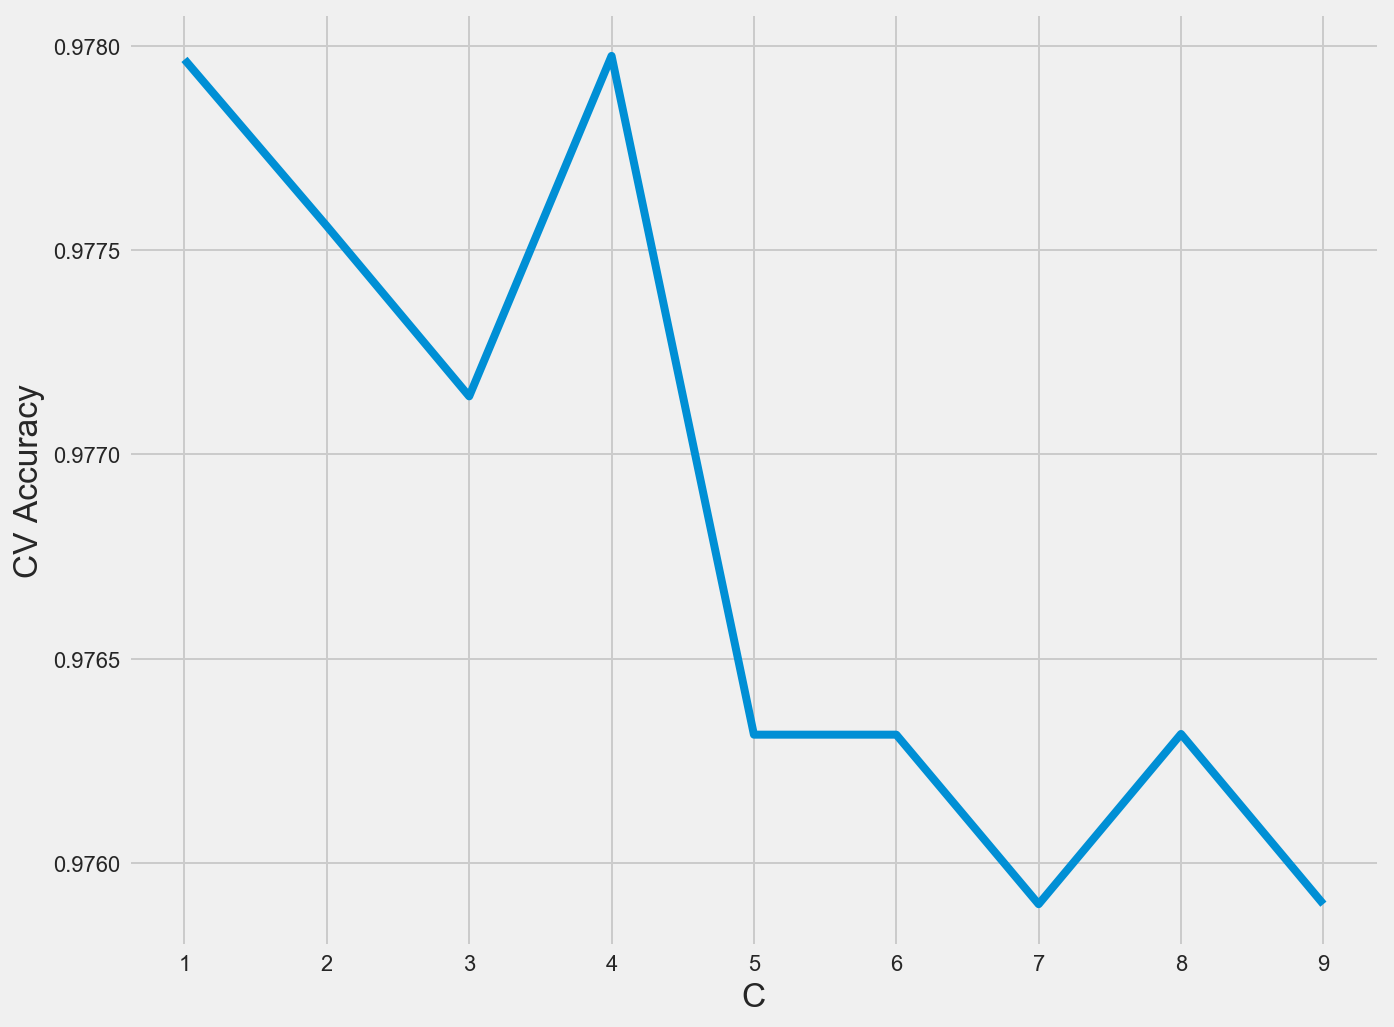

In [52]:
# Plot the value of C (x-axis) versus the cross-validated accuracy (y-axis)
ax = sns.lineplot(x=C_range, y=acc_score)
plt.xlabel('C')
plt.ylabel('CV Accuracy')
plt.show()

Best C is at 1

**Optimized SVM-RBF**

In [53]:
# Training and Prediction
throid_svc_model = SVC(kernel ='rbf', C =1, gamma =0.001)

# Train the model using the training set
throid_svc_model.fit(X_train,y_train)

# Predict the response for the test set
y_pred_svm = throid_svc_model.predict(X_test)

#Results
model_results('SVM-RBF',y_test, y_pred_svm)

,Model,R2,Accuracy Score,F1 score,Recall,Precision,RMSE,TP,TN,FP,FN
0,Random Forest,0.790,0.990,0.990,0.990,0.990,0.100,25,571,1,5
1,AdaBoost,0.930,0.997,0.997,0.997,0.997,0.058,29,571,1,1
2,GBR,0.790,0.990,0.990,0.990,0.990,0.100,26,570,2,4
3,GBR Optimized,0.860,0.993,0.993,0.993,0.993,0.082,27,571,1,3
4,SVM-RBF,0.158,0.960,0.947,0.960,0.962,0.200,6,572,0,24
5,SVM-Linear,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0
6,SVM-Polynomial,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0


The False negatives have reduced from 25 to 9 after hyperparameters optimization

### SVM with Linear Kernel Classifier

#### Training with default SVM Linear hyperparameters

In [54]:
throid_svc_model = SVC(kernel = 'linear')

# Train the model using the training set
throid_svc_model.fit(X_train,y_train)

# Predict the response for the test set
y_pred_svm = throid_svc_model.predict(X_test)

#Get the scores
model_results('SVM-Linear',y_test, y_pred_svm)


,Model,R2,Accuracy Score,F1 score,Recall,Precision,RMSE,TP,TN,FP,FN
0,Random Forest,0.790,0.990,0.990,0.990,0.990,0.100,25,571,1,5
1,AdaBoost,0.930,0.997,0.997,0.997,0.997,0.058,29,571,1,1
2,GBR,0.790,0.990,0.990,0.990,0.990,0.100,26,570,2,4
3,GBR Optimized,0.860,0.993,0.993,0.993,0.993,0.082,27,571,1,3
4,SVM-RBF,0.158,0.960,0.947,0.960,0.962,0.200,6,572,0,24
5,SVM-Linear,0.509,0.977,0.974,0.977,0.976,0.152,17,571,1,13
6,SVM-Polynomial,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0


F1 score is at 98% with 10 wrongly classified False Negatives. To tune the hyperparameters so as to improve the score

#### SVM Linear hyperparameters optimization

**C parameter**

In [55]:
#Parameter List for C
C_range=list(np.arange(0.001,3,0.1))
acc_score=[]

#Loop through the C range above
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X_train, y_train, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.9584196358149585, 0.9792184481556419, 0.9800517814889751, 0.9808833859149779, 0.9808833859149779, 0.9808833859149779, 0.9804684481556418, 0.9804684481556418, 0.9808833859149779, 0.9800535103963057, 0.9800535103963057, 0.9800535103963057, 0.9808833859149779, 0.9808833859149779, 0.9808833859149779, 0.9808833859149779, 0.9808833859149779, 0.9808833859149779, 0.9813000525816445, 0.9813000525816445, 0.9813000525816445, 0.9813000525816445, 0.9813000525816445, 0.9813000525816445, 0.9813000525816445, 0.9813000525816445, 0.9813000525816445, 0.9813000525816445, 0.9813000525816445, 0.9813000525816445]


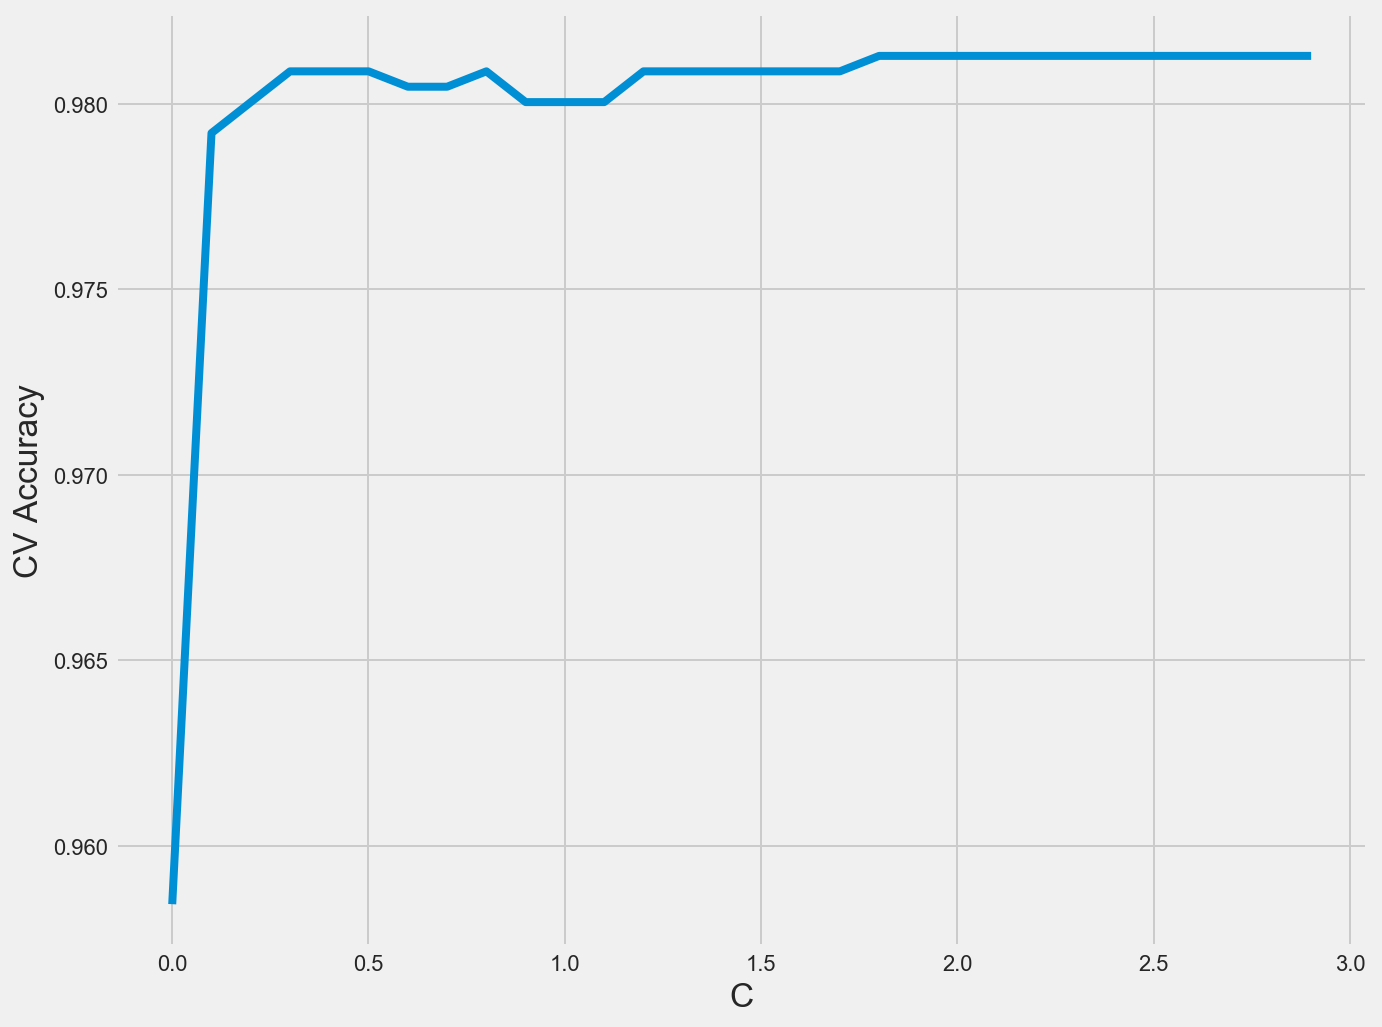

In [56]:
# Plot the value of C (x-axis) versus the cross-validated accuracy (y-axis)
ax = sns.lineplot(x=C_range, y=acc_score)
plt.xlabel('C')
plt.ylabel('CV Accuracy')
plt.show()

Optimal C is as from 1.7. No improvement in accuracy noted thereafter.

**Apply Optimized C to SVM Linear**

In [57]:
throid_svc_model = SVC(kernel = 'linear',C = 2)

# Train the model using the training set
throid_svc_model.fit(X_train,y_train)

# Predict the response for the test set
y_pred_svm = throid_svc_model.predict(X_test)

#Get the scores
model_results('SVM-Linear',y_test, y_pred_svm)

,Model,R2,Accuracy Score,F1 score,Recall,Precision,RMSE,TP,TN,FP,FN
0,Random Forest,0.790,0.990,0.990,0.990,0.990,0.100,25,571,1,5
1,AdaBoost,0.930,0.997,0.997,0.997,0.997,0.058,29,571,1,1
2,GBR,0.790,0.990,0.990,0.990,0.990,0.100,26,570,2,4
3,GBR Optimized,0.860,0.993,0.993,0.993,0.993,0.082,27,571,1,3
4,SVM-RBF,0.158,0.960,0.947,0.960,0.962,0.200,6,572,0,24
5,SVM-Linear,0.614,0.982,0.980,0.982,0.981,0.135,20,571,1,10
6,SVM-Polynomial,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0


<span class="girk">Accuracy has improved from 50.9 to 61% after optimization of C parameter for Linear Kerner function</span>

### Support Vector Machine Classifier - Polynomial

#### Training with default SVM Polynomial hyperparameter

In [58]:
#Polynomial
throid_svc_model = SVC(kernel = 'poly')

# Train the model using the training set
throid_svc_model.fit(X_train,y_train)

# Predict the response for the test set
y_pred_svm = throid_svc_model.predict(X_test)

#Results
model_results('SVM-Polynomial',y_test, y_pred_svm)

,Model,R2,Accuracy Score,F1 score,Recall,Precision,RMSE,TP,TN,FP,FN
0,Random Forest,0.790,0.990,0.990,0.990,0.990,0.100,25,571,1,5
1,AdaBoost,0.930,0.997,0.997,0.997,0.997,0.058,29,571,1,1
2,GBR,0.790,0.990,0.990,0.990,0.990,0.100,26,570,2,4
3,GBR Optimized,0.860,0.993,0.993,0.993,0.993,0.082,27,571,1,3
4,SVM-RBF,0.158,0.960,0.947,0.960,0.962,0.200,6,572,0,24
5,SVM-Linear,0.614,0.982,0.980,0.982,0.981,0.135,20,571,1,10
6,SVM-Polynomial,0.474,0.975,0.971,0.975,0.976,0.158,15,572,0,15


#### SVM Polynomial Optimization

**a) Degree**

In [59]:
#Parameter List for Degree
D_range=list(range(1,10))
acc_score=[]

#Loop through the Degree range above
for d in D_range:
    svc = SVC(kernel='poly', degree=d)
    scores = cross_val_score(svc, X_train, y_train, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)


[0.9792184481556419, 0.9771420304516305, 0.9767287930226443, 0.9742374232708068, 0.9729960535189693, 0.971329401140793, 0.971329401140793, 0.9709092909479555, 0.9692529691482916]


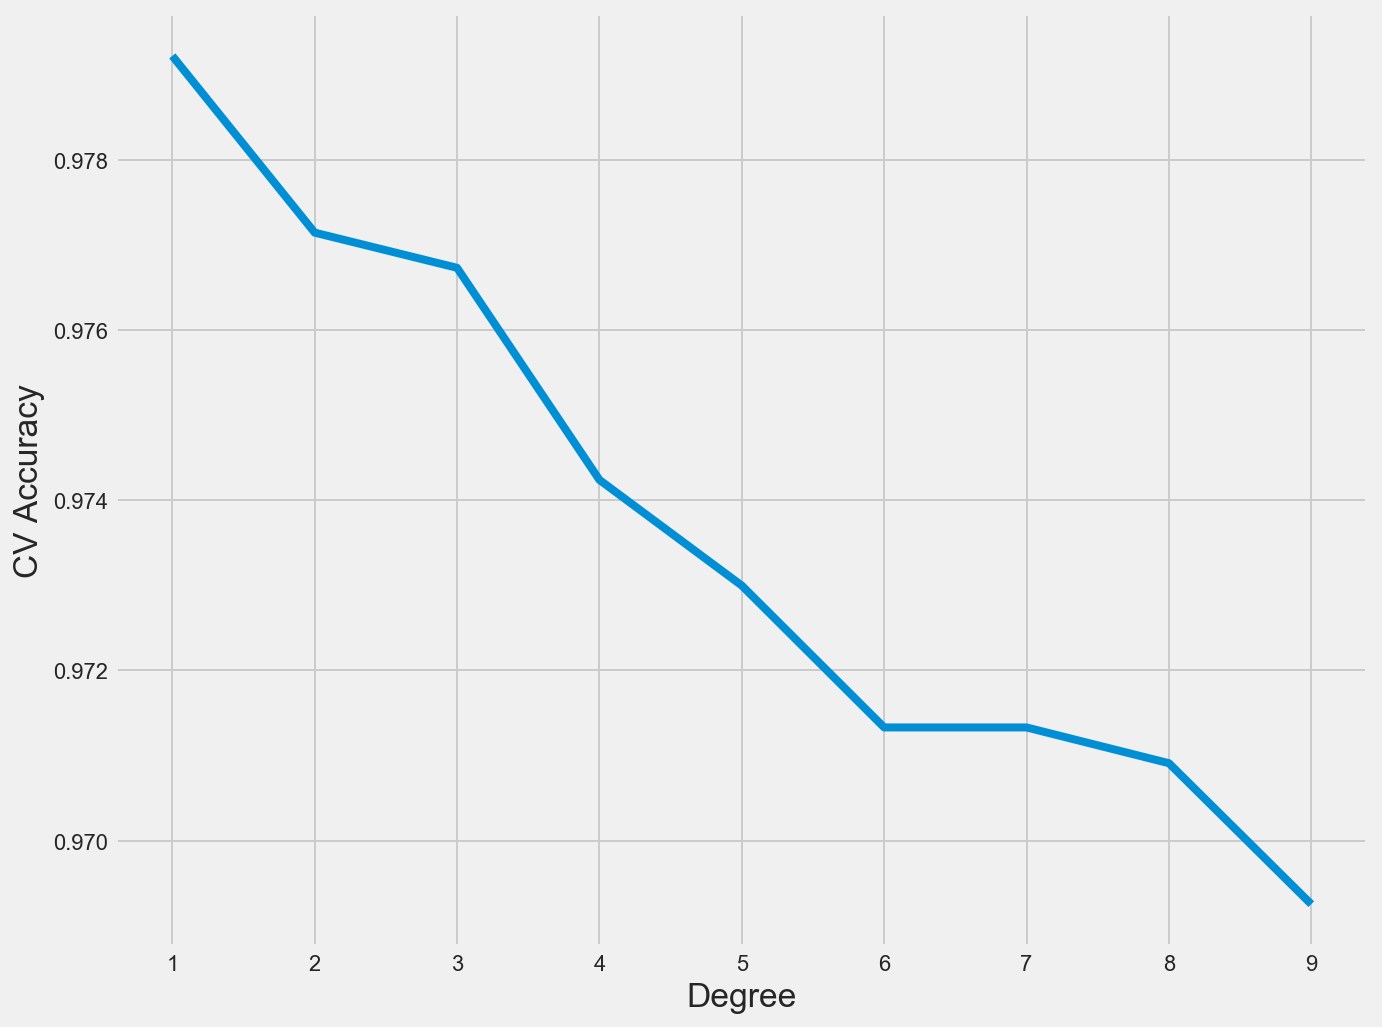

In [60]:
# Plot the value of degree (x-axis) versus the cross-validated accuracy (y-axis)
ax = sns.lineplot(x=D_range, y=acc_score)
plt.xlabel('Degree')
plt.ylabel('CV Accuracy')
plt.show()

Accuracy decreases with increase in degrees of polynomial

**b) C parameter**

In [61]:
#Parameter List for C
C_range=list(np.arange(0.001,3,0.1))
acc_score=[]

#Loop through the C range above
for c in C_range:
    svc = SVC(kernel='poly', C=c)
    scores = cross_val_score(svc, X_train, y_train, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.9609161780002973, 0.9704839940331265, 0.9742270926922945, 0.9754753637849639, 0.9771403015442999, 0.9767270784038041, 0.974648917503972, 0.9754805219299747, 0.9763138552633082, 0.977145459689311, 0.9767287930226443, 0.9767287930226443, 0.9763138552633082, 0.9763138552633082, 0.9763138552633082, 0.9763138552633082, 0.9767305219299749, 0.9771471885966416, 0.9771471885966416, 0.9775621263559777, 0.9775621263559777, 0.9779770641153138, 0.9779770641153138, 0.9783920018746499, 0.9783920018746499, 0.9788086685413167, 0.9792236063006527, 0.9792236063006527, 0.978806939633986, 0.978806939633986]


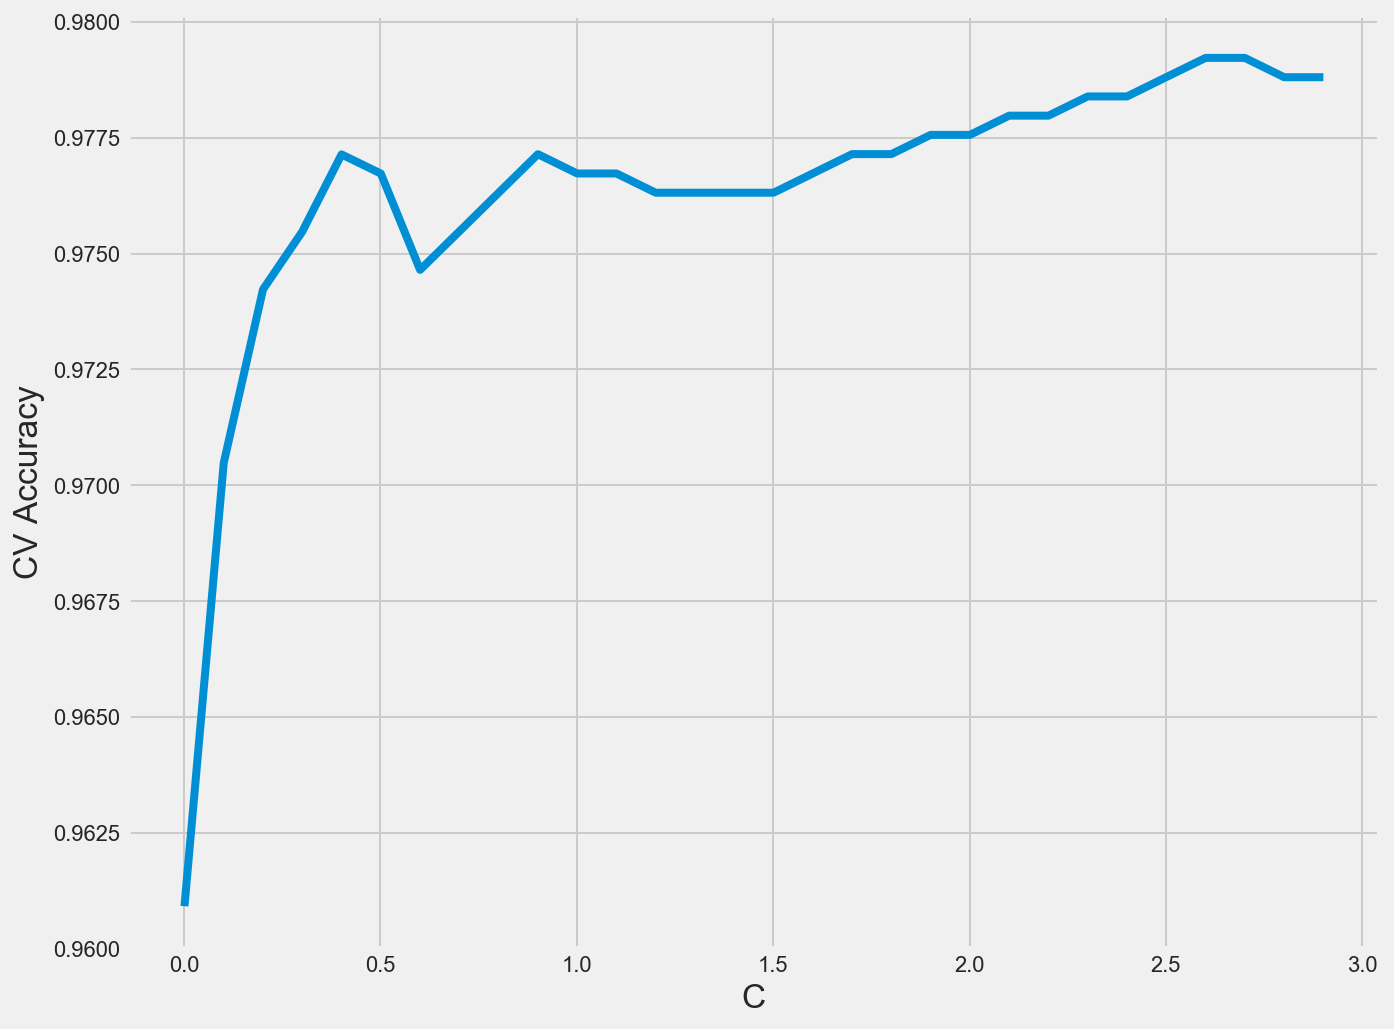

In [62]:
# Plot the value of degree (x-axis) versus the cross-validated accuracy (y-axis)
ax = sns.lineplot(x=C_range, y=acc_score)
plt.xlabel('C')
plt.ylabel('CV Accuracy')
plt.show()

#### Apply Optimized Parameters to SVM Polynomial

In [63]:
#Polynomial
throid_svc_model = SVC(kernel = 'poly',degree =3, C =2.7)

# Train the model using the training set
throid_svc_model.fit(X_train,y_train)

# Predict the response for the test set
y_pred_svm = throid_svc_model.predict(X_test)

#Results
model_results('SVM-Polynomial',y_test, y_pred_svm)

,Model,R2,Accuracy Score,F1 score,Recall,Precision,RMSE,TP,TN,FP,FN
0,Random Forest,0.790,0.990,0.990,0.990,0.990,0.100,25,571,1,5
1,AdaBoost,0.930,0.997,0.997,0.997,0.997,0.058,29,571,1,1
2,GBR,0.790,0.990,0.990,0.990,0.990,0.100,26,570,2,4
3,GBR Optimized,0.860,0.993,0.993,0.993,0.993,0.082,27,571,1,3
4,SVM-RBF,0.158,0.960,0.947,0.960,0.962,0.200,6,572,0,24
5,SVM-Linear,0.614,0.982,0.980,0.982,0.981,0.135,20,571,1,10
6,SVM-Polynomial,0.544,0.978,0.976,0.978,0.978,0.147,18,571,1,12


Accuracy increased from 47 to 54% after optimization

## Model Evaluation

In [68]:
#Models score output ordered in descending from best to worst model
df_results.sort_values(by=['F1 score','TP','TN'], ascending =False)

,Model,R2,Accuracy Score,F1 score,Recall,Precision,RMSE,TP,TN,FP,FN
1,AdaBoost,0.930,0.997,0.997,0.997,0.997,0.058,29,571,1,1
3,GBR Optimized,0.860,0.993,0.993,0.993,0.993,0.082,27,571,1,3
2,GBR,0.790,0.990,0.990,0.990,0.990,0.100,26,570,2,4
0,Random Forest,0.790,0.990,0.990,0.990,0.990,0.100,25,571,1,5
5,SVM-Linear,0.614,0.982,0.980,0.982,0.981,0.135,20,571,1,10
6,SVM-Polynomial,0.544,0.978,0.976,0.978,0.978,0.147,18,571,1,12
4,SVM-RBF,0.158,0.960,0.947,0.960,0.962,0.200,6,572,0,24


Adaboost is the best classifer with an F1 score of 99.7 percent and only 2 values incorrectly classified.


The data with respect to target variable is imbalanced as we have more positives than negatives. Therebeing, F1 score is the best measure of the accuracy as it applies weighted score. The F1 score across all models range from 94 to 99%. This is worrying as could imply overfitting. 
To ensure we do not have overfitting

a) Hyperparameter tuning was done especially for SVM and Gradient boosting where optimal parameter across training and test data was observed.

b) Confusion metrics are also considered. Adaboost has lease false positives and negatives.

False positives in medical scenario are better than false negatives since a health proffessional can validate the false positive ones. The model is not sending away many patients who are sick. Only one was false negative.

This implies the model is of good fit.

**Challenging the Model**

Multiple models were implemented and functions as well to faciliate comparison of scores and features across different classifiers.

In each model, Hyperparameter tuning was done against each model to ensure the model has the best accuracy.

Observations:
- Gradient boosting R2 score improved from 79 to 86% by hyperparameter tuning. See results table above (GBR versus GBR optimized)
The FP and FN also reduced.

Such improvements in accuracy were noted across all classifiers.


**Constraints**

1. The solution above primarily was a technical delivery for prediction. However, to make such an implementation a reality, further detailed engagement is required with domain experts i.e Endocrinologists , researchers and other medical proffessionals to appreciate better the domain area and features.

2. TBG had over 90% missing data hence feature was not used in analysis and modelling

3. For missing values, imputation was done using either median, mean and mode. Further evaluation of imputation using classifier model needs to be evaluated and if there is improvement in performance.

**Open questions**

Is the F1 score output versus the confusion matrix justification provided above justifiable?

What are the perceptions of a health domain expert e.g an endocrinologist as regards the model outcome?